In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from scipy import stats

# Level 1: Basic Insights

**Q1: Find Mean, Median, and Mode (Age)**

In [36]:
dataset = pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv')

  Mean, Median and Mode of AGE

In [37]:
mean_age = dataset['Age'].mean()
median_age = dataset['Age'].median()
mode_age = dataset['Age'].mode()[0]

Printing Mean, Median and Mode (the first value of the Mode)

In [38]:
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

Mean Age: 43.7899
Median Age: 44.0
Mode Age: 51


Visualizing  Count Of Customers By Age Group

Age group count : Age Group
0-20      381
21-40    3774
41-60    3891
61+      1954
Name: count, dtype: int64


<ipython-input-39-c49eb39aae31>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




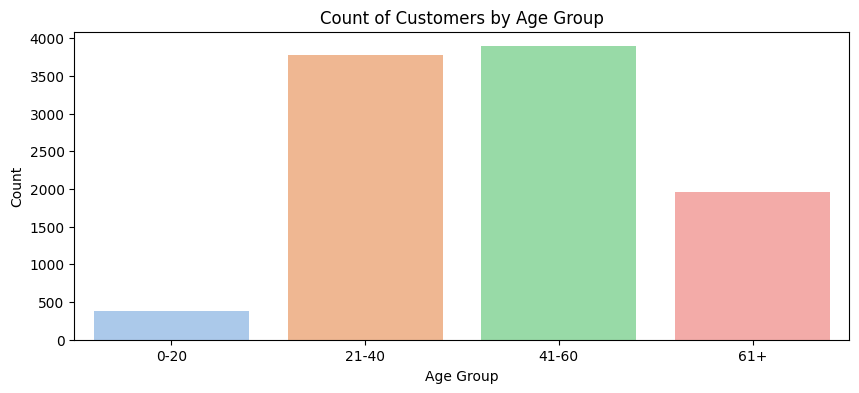

In [39]:
plt.figure(figsize=(10, 4))

bins = [0, 20, 40, 60, 80]
labels = ['0-20', '21-40', '41-60', '61+']
dataset['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

age_group_counts = dataset['Age Group'].value_counts().sort_index()
print(f"Age group count : {age_group_counts}")

sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='pastel')
plt.title('Count of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

**Q2: Find variance, standard deviation,and z-score ( Purchase Amount )**


In [40]:
purchase_amount = dataset['Purchase Amount ($)']

variance = purchase_amount.var()
std_deviation = purchase_amount.std()

z_scores = (purchase_amount - purchase_amount.mean()) / std_deviation

print(f"Variance (Purchase Amount $) : {variance}")
print(f"Standard Deviation (Purchase Amount $) : {std_deviation}")
print(f"Z-Scores (Purchase Amount $) : {z_scores}")

Variance (Purchase Amount $) : 81932.24073019275
Standard Deviation (Purchase Amount $) : 286.23808399685873
Z-Scores (Purchase Amount $) : 0      -1.052804
1       0.531192
2       1.606207
3      -0.063942
4      -1.259869
          ...   
9995   -1.413727
9996    1.026829
9997    1.104946
9998   -1.638330
9999   -0.944817
Name: Purchase Amount ($), Length: 10000, dtype: float64


  Plotting the Z-score of Purchase Amount $

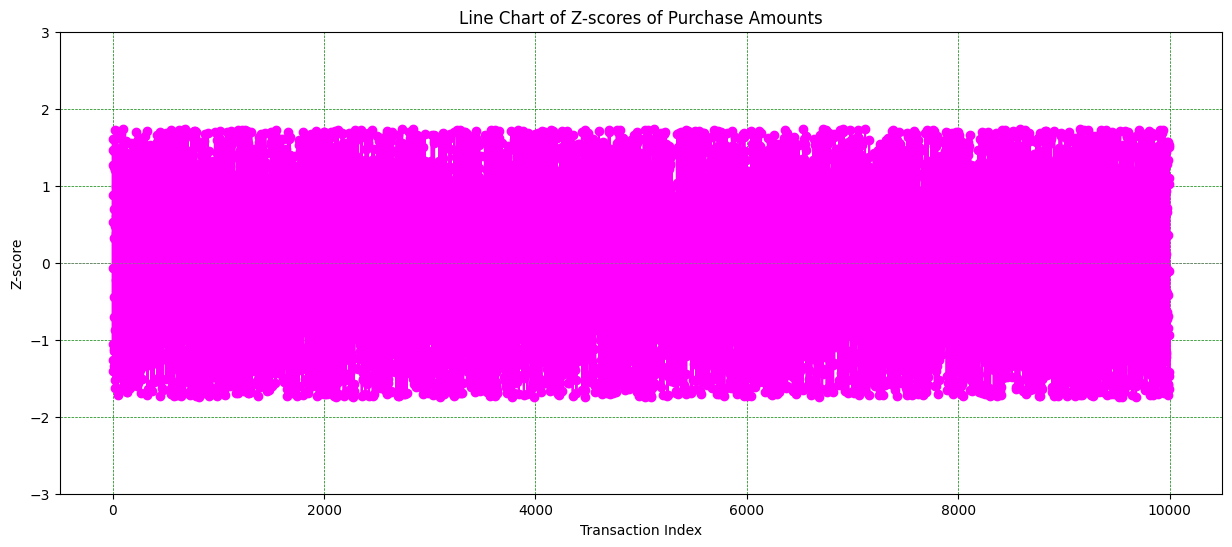

In [41]:
mean_purchase = purchase_amount.mean()

plt.figure(figsize=(15, 6), facecolor='white')

plt.plot(z_scores.index, z_scores, marker='o', linestyle='-', color='magenta', label='Z-scores')

plt.ylim(-3, 3)

plt.title('Line Chart of Z-scores of Purchase Amounts', color='black')
plt.xlabel('Transaction Index', color='black')
plt.ylabel('Z-score', color='black')

plt.grid(color='green', linestyle='--', linewidth=0.5)

plt.xticks(color='black')
plt.yticks(color='black')

plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()


Bar plot of Z-score values

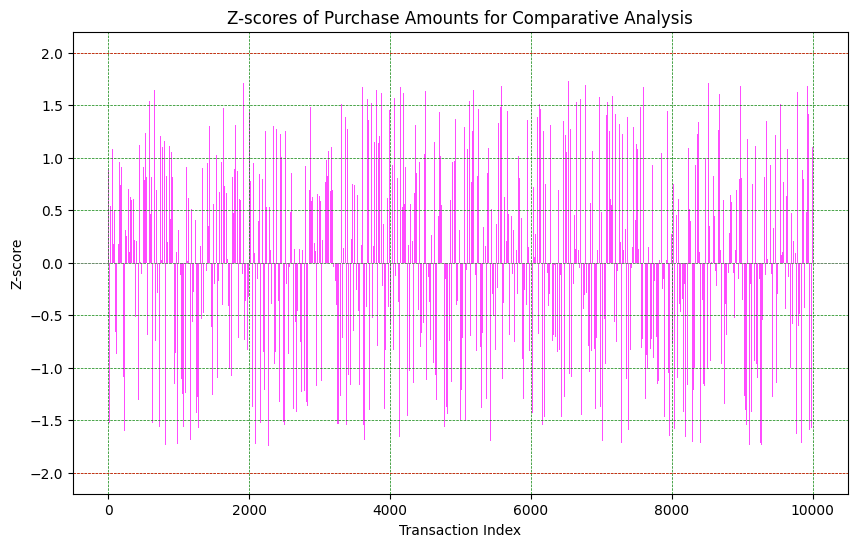

In [42]:
plt.figure(figsize=(10, 6), facecolor='white')

plt.bar(z_scores.index, z_scores, color='magenta', alpha=0.7)

plt.title('Z-scores of Purchase Amounts for Comparative Analysis', color='black')
plt.xlabel('Transaction Index', color='black')
plt.ylabel('Z-score', color='black')

plt.grid(color='green', linestyle='--', linewidth=0.5)

plt.xticks(color='black')
plt.yticks(color='black')

plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.axhline(2, color='red', linewidth=0.5, linestyle='--', label='Z-score = 2')
plt.axhline(-2, color='red', linewidth=0.5, linestyle='--')

plt.show()

Z-score VS product category


In [43]:
category_stats = dataset.groupby('Product Category')['Purchase Amount ($)'].agg(['mean', 'std']).reset_index()

dataset = dataset.merge(category_stats, on='Product Category', suffixes=('', '_stats'))
dataset['Z-score'] = (dataset['Purchase Amount ($)'] - dataset['mean']) / dataset['std']

average_z_scores = dataset.groupby('Product Category')['Z-score'].mean().reset_index()

average_z_scores = average_z_scores.sort_values(by='Z-score', ascending=True)

print(average_z_scores)

  Product Category       Z-score
0           Beauty -2.189619e-16
5             Home -1.567477e-16
2         Clothing -1.371729e-16
1            Books -8.811849e-17
3      Electronics  1.815032e-17
7             Toys  5.602834e-17
6           Sports  6.000422e-17
4        Groceries  1.570877e-16


Ploting Z-score VS product category

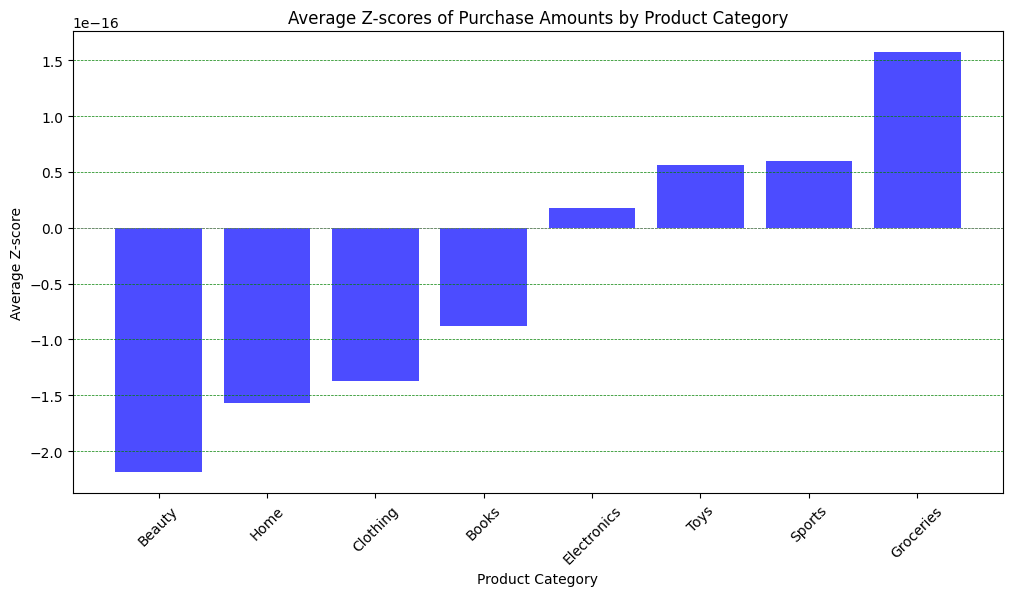

In [44]:

plt.figure(figsize=(12, 6), facecolor='white')

plt.bar(average_z_scores['Product Category'], average_z_scores['Z-score'], color='blue', alpha=0.7)

plt.title('Average Z-scores of Purchase Amounts by Product Category', color='black')
plt.xlabel('Product Category', color='black')
plt.ylabel('Average Z-score', color='black')

plt.grid(color='green', linestyle='--', linewidth=0.5, axis='y')

plt.xticks(color='black', rotation=45)
plt.yticks(color='black')

plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.show()

Insights


1.  Groceries and Sports: These categories have the highest average z-scores, indicating that purchases in these categories are significantly higher than their respective means. This suggests strong demand or a higher average spending behavior.
2.   Beauty, Clothing, and Home: These categories have negative average z-scores, meaning that their purchase amounts are below the mean. This may indicate lower demand or customer satisfaction in these areas.





**Q3: What are the top three product categories based on the number of purchases?**

  Product Category  Number of Purchases
0      Electronics                 1309
1         Clothing                 1297
2             Toys                 1288
3            Books                 1270
4             Home                 1265
5           Beauty                 1229
6        Groceries                 1193
7           Sports                 1149


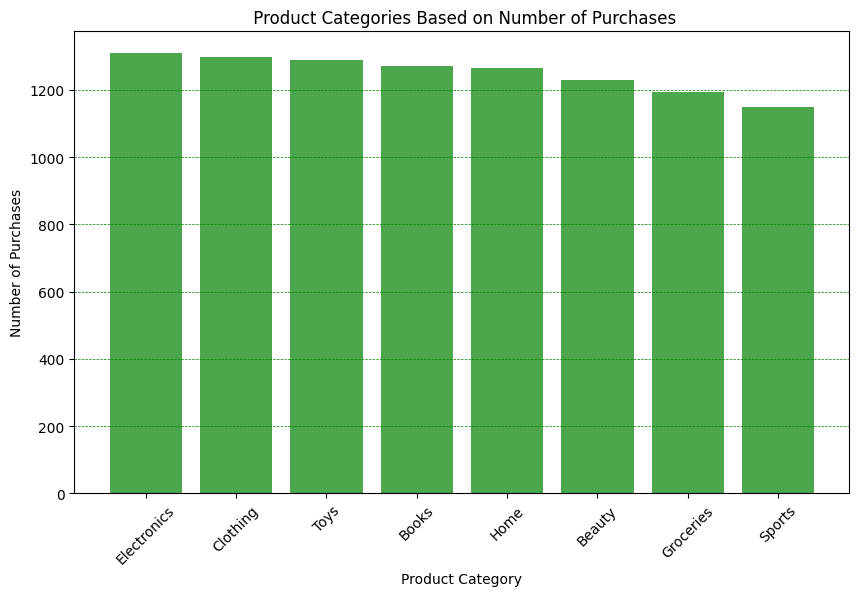

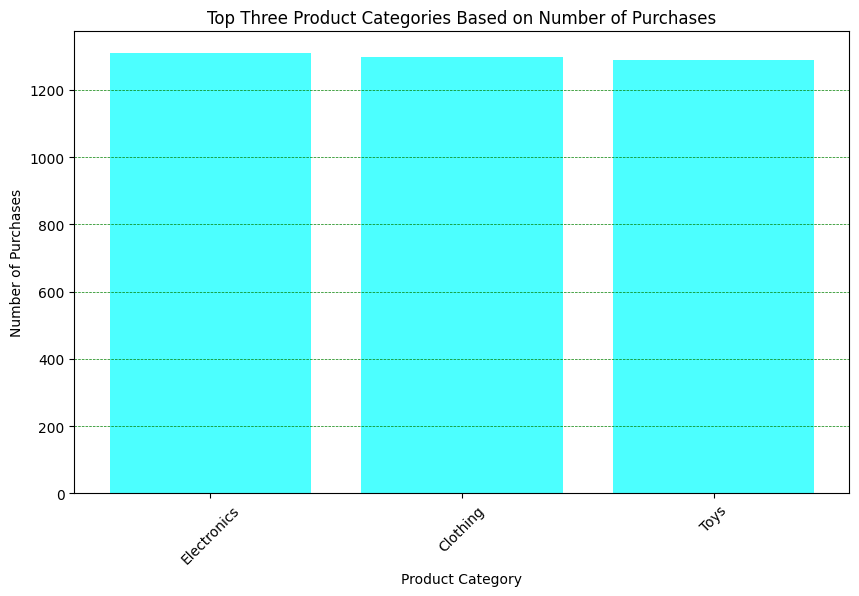

In [45]:
purchase_counts = dataset['Product Category'].value_counts().reset_index()
purchase_counts.columns = ['Product Category', 'Number of Purchases']

top_three_categories = purchase_counts
print(top_three_categories)

plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(top_three_categories['Product Category'], top_three_categories['Number of Purchases'], color='green', alpha=0.7)

plt.title(' Product Categories Based on Number of Purchases', color='black')
plt.xlabel('Product Category', color='black')
plt.ylabel('Number of Purchases', color='black')

plt.grid(color='green', linestyle='--', linewidth=0.5, axis='y')

plt.xticks(color='black', rotation=45)
plt.yticks(color='black')

plt.show()

top_three_categories = purchase_counts.head(3)

plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(top_three_categories['Product Category'], top_three_categories['Number of Purchases'], color='cyan', alpha=0.7)

plt.title('Top Three Product Categories Based on Number of Purchases', color='black')
plt.xlabel('Product Category', color='black')
plt.ylabel('Number of Purchases', color='black')

plt.grid(color='green', linestyle='--', linewidth=0.5, axis='y')

plt.xticks(color='black', rotation=45)
plt.yticks(color='black')

plt.show()

Visualization of how each gender contributes to the purchase of different product types in pie chart

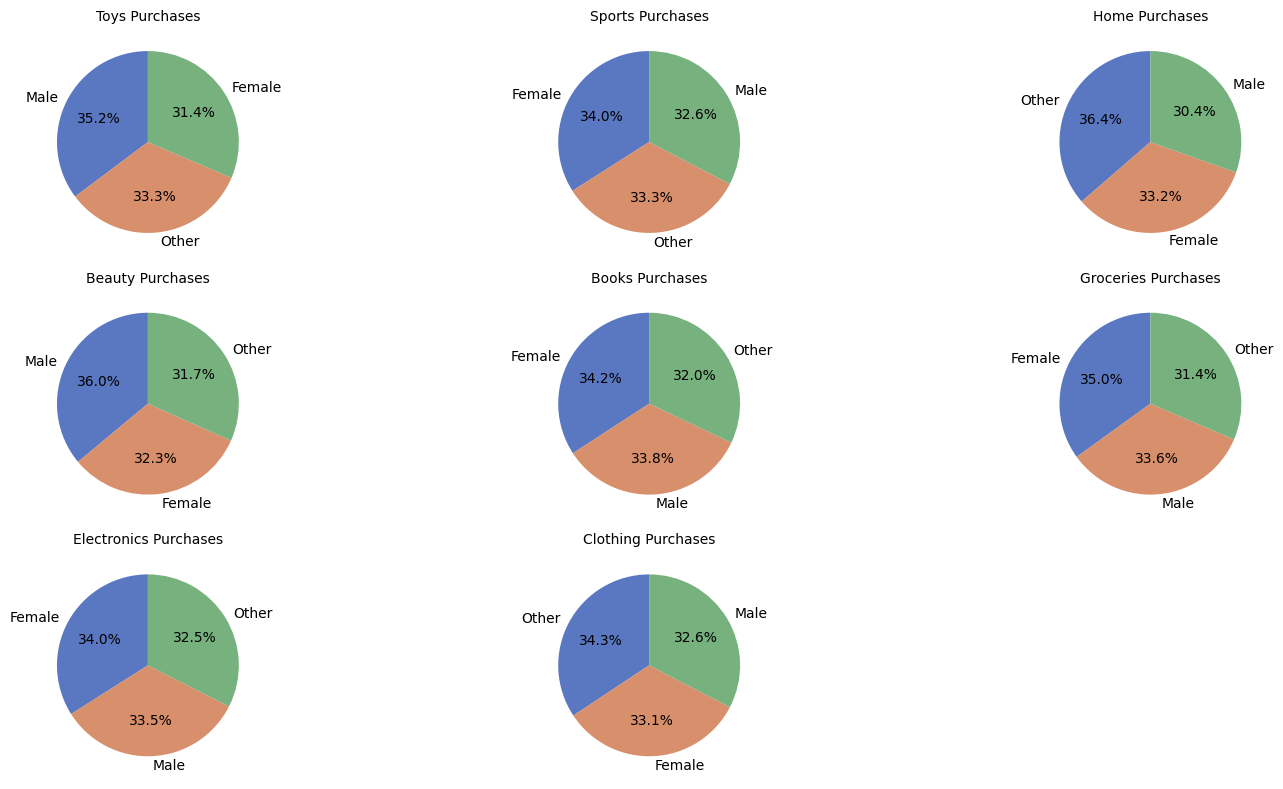

In [46]:
# List of unique product categories
product_categories = dataset['Product Category'].unique()

# Define custom colors (same as in the bar chart image)
custom_colors = ['#5A78C1', '#D88F6B', '#76B17E']  # blue, orange, green

# Determine the number of rows and columns for subplots
num_categories = len(product_categories)
cols = 3  # Set the number of columns (you can adjust it)
rows = (num_categories // cols) + (num_categories % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust the figsize for better visualization
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each product category and create a pie chart for gender breakdown
for i, category in enumerate(product_categories):
    # Filter data for the current product category
    category_data = dataset[dataset['Product Category'] == category]

    # Group by Gender to count the purchases in this product category
    gender_counts = category_data['Gender'].value_counts()

    # Create a pie chart on the current subplot
    axes[i].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
    axes[i].set_title(f'{category} Purchases', fontsize=10)

# Remove any empty subplots if the number of categories is not a perfect multiple of cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Q4: How many customers are classified as return customers?**

---



In [47]:

return_customer_count = dataset['Return Customer'].value_counts().get(True, 0)
new_customer_count = dataset['Return Customer'].value_counts().get(False, 0)

print(f"Number of Return Customers: {return_customer_count}")
print(f"Number of New Customers: {new_customer_count}")

Number of Return Customers: 4996
Number of New Customers: 5004


**Q5: What is the average review score given by customers?**



In [48]:
average_review_score = dataset['Review Score (1-5)'].mean()
print(f"Average Review Score: {average_review_score}")

Average Review Score: 2.9951


**Q6: How does the average delivery time vary between subscription statuses (Free, Premium)?**

In [49]:
average_delivery_time = dataset.groupby('Subscription Status')['Delivery Time (days)'].mean().reset_index()
print(f"Average Delivery Time by Subscription Status: {average_delivery_time}")

Average Delivery Time by Subscription Status:   Subscription Status  Delivery Time (days)
0                Free              6.963924
1             Premium              7.070347
2               Trial              7.004272



*   Premium subscribers have the highest average delivery time, albeit slightly, which might warrant further investigation to ensure that premium services meet customer expectations.




**Q7: How many customers are subscribed to the service?**

Number of Customers Subscribed to the Service: 6646


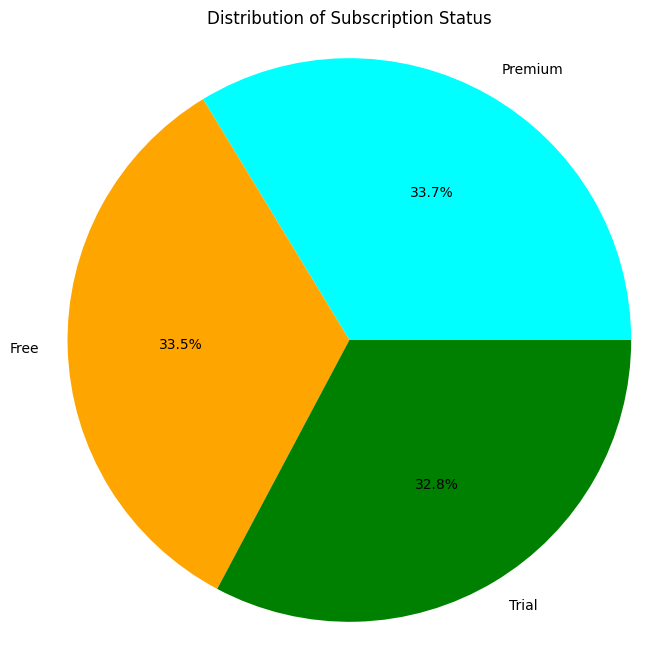

In [50]:
subscribed_customers_count = dataset[dataset['Subscription Status'].isin(['Premium', 'Trial'])].shape[0]
print(f"Number of Customers Subscribed to the Service: {subscribed_customers_count}")


subscription_counts = dataset['Subscription Status'].value_counts()

plt.figure(figsize=(8, 8), facecolor='white')
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['cyan', 'orange', 'green', 'red'])
plt.title('Distribution of Subscription Status', color='black')
plt.axis('equal')
plt.show()


**Q8: What percentage of customers used devices to make purchases? (Mobile,Laptop,
 Tablet)**

In [51]:
total_customers = dataset.shape[0]

device_users_count = dataset[dataset['Device Type'].isin(['Mobile', 'Laptop', 'Tablet'])].shape[0]
device_users_count2 = dataset[dataset['Device Type'].isin(['Laptop'])].shape[0]
print(device_users_count2)

percentage_device_users = (device_users_count / total_customers) * 100
print(f"total number of customers : {total_customers}")
print(f"total number of people used mobile, laptop, tablet: {device_users_count}")
print(f"Percentage of Customers Using Devices to Make Purchases: {percentage_device_users:.2f}%")

0
total number of customers : 10000
total number of people used mobile, laptop, tablet: 6652
Percentage of Customers Using Devices to Make Purchases: 66.52%


**Q9: What is the average purchase amount for customers who availed discounts compared to those who didn't?**

In [52]:
average_purchase_with_discount = dataset[dataset['Discount Availed'] == True]['Purchase Amount ($)'].mean()
average_purchase_without_discount = dataset[dataset['Discount Availed'] == False]['Purchase Amount ($)'].mean()

print(f"Average Purchase Amount with Discounts: {average_purchase_with_discount}")
print(f"Average Purchase Amount without Discounts: {average_purchase_without_discount}")

Average Purchase Amount with Discounts: 505.2641777954953
Average Purchase Amount without Discounts: 502.5114509331728


**Q10: What is the most common payment method used by customers?**

Most Common Payment Method: Bank Transfer
Payment Method Counts:
Payment Method
Bank Transfer       2067
Credit Card         2028
Cash on Delivery    2007
Debit Card          1983
PayPal              1915
Name: count, dtype: int64


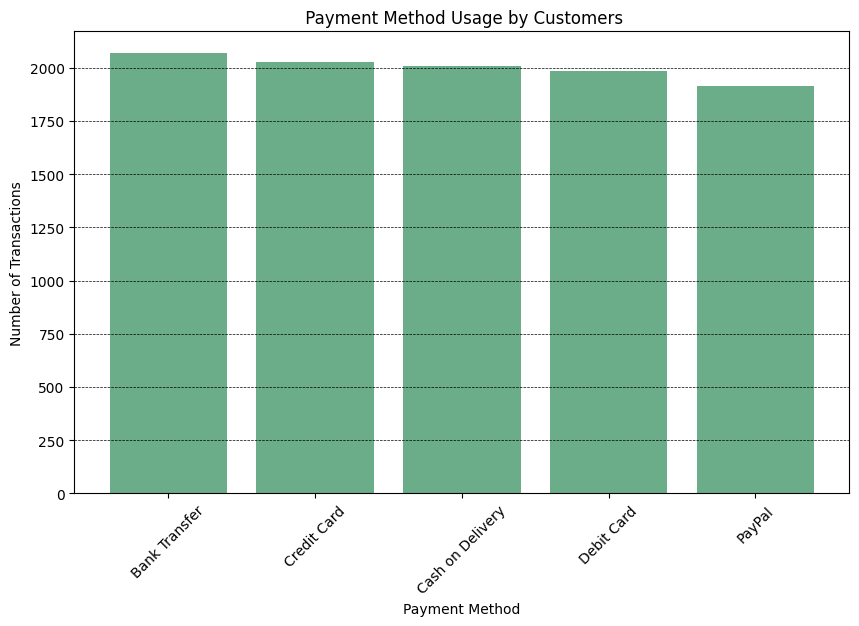

In [53]:
most_common_payment_method = dataset['Payment Method'].mode()[0]
payment_method_counts = dataset['Payment Method'].value_counts()

print(f"Most Common Payment Method: {most_common_payment_method}")
print("Payment Method Counts:")
print(payment_method_counts)
most_common_payment_method, payment_method_counts

plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(payment_method_counts.index, payment_method_counts.values, color='seagreen', alpha=0.7)

plt.title(' Payment Method Usage by Customers', color='black')
plt.xlabel('Payment Method', color='black')
plt.ylabel('Number of Transactions', color='black')

plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')

plt.xticks(color='black', rotation=45)
plt.yticks(color='black')

plt.show()

Bank Transfer is the most frequently used payment method, closely followed by Credit Card. This could indicate customer preference for direct bank transactions.

**Level 2: Intermediate Insights**

---




**Q1: What are the average review scores of users of the most common payment method?**

In [54]:
most_common_payment_method = dataset['Payment Method'].mode()[0]

average_review_score = dataset[dataset['Payment Method'] == most_common_payment_method]['Review Score (1-5)'].mean()

print(f"Average Review Score of Users of the Most Common Payment Method: {average_review_score}")


Average Review Score of Users of the Most Common Payment Method: 2.9888727624576683




*  The average review score of 2.99 indicates that customers using Bank Transfer generally have a neutral sentiment regarding their purchasing experience.



**Q2: What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items?**

Correlation between Time Spent on Website and Purchase Amount: 0.01002480995875274
Average Items Purchased based on Time Spent on Website:
Time Spent on Website (min)
1    5.235632
2    5.142045
3    5.072289
4    4.946429
5    5.107692
Name: Number of Items Purchased, dtype: float64


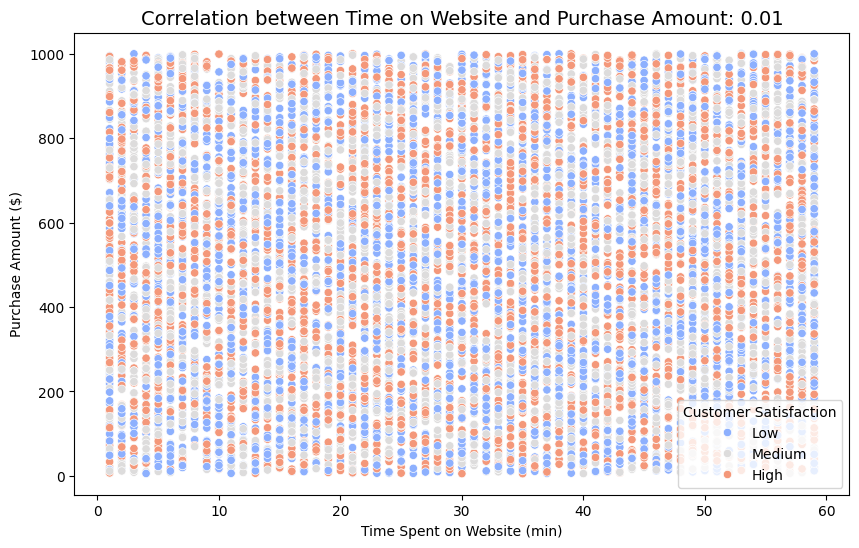

In [55]:
correlation = dataset['Time Spent on Website (min)'].corr(dataset['Purchase Amount ($)'])

average_items_based_on_time = dataset.groupby('Time Spent on Website (min)')['Number of Items Purchased'].mean()
print(f"Correlation between Time Spent on Website and Purchase Amount: {correlation}")
print(f"Average Items Purchased based on Time Spent on Website:")
print(average_items_based_on_time.head())

correlation = dataset['Time Spent on Website (min)'].corr(dataset['Purchase Amount ($)'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time Spent on Website (min)', y='Purchase Amount ($)', data=dataset, hue='Customer Satisfaction', palette='coolwarm')
plt.title(f'Correlation between Time on Website and Purchase Amount: {correlation:.2f}', fontsize=14)
plt.xlabel('Time Spent on Website (min)')
plt.ylabel('Purchase Amount ($)')
plt.show()




* The correlation between time spent on the website and purchase amount is approximately 0.01. This indicates a very weak positive correlation, suggesting that there is little to no relationship between the amount of time customers spend on the website and the total purchase amount.

* The low correlation coefficient suggests that simply spending more time on the website does not significantly lead to higher purchase amounts. Customers may spend time browsing without making substantial purchases.

* While the average number of items purchased does vary slightly with time, the differences are not substantial, indicating that time spent may not directly translate into higher transaction sizes.

Visualized correlation with a regression line.




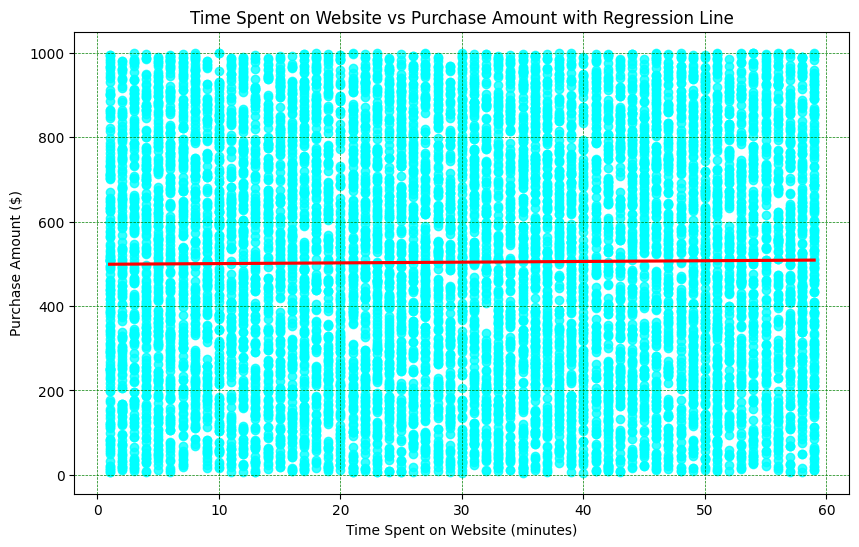

In [56]:
plt.figure(figsize=(10, 6), facecolor='white')

sns.regplot(x='Time Spent on Website (min)', y='Purchase Amount ($)', data=dataset, scatter_kws={'color': 'cyan'}, line_kws={'color': 'red'}, ci=None)

plt.title('Time Spent on Website vs Purchase Amount with Regression Line', color='black')
plt.xlabel('Time Spent on Website (minutes)', color='black')
plt.ylabel('Purchase Amount ($)', color='black')

plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(color='green', linestyle='--', linewidth=0.5)

plt.show()


* The red line represents the linear relationship between time spent on the website and purchase amount. The relatively flat slope of the line reaffirms the weak correlation between these two variables.

**Q3: What percentage of customers are satisfied (rating of 4 or 5 ) and are also return customers?**

Percentage of Satisfied Customers who are also Return Customers: 20.08%


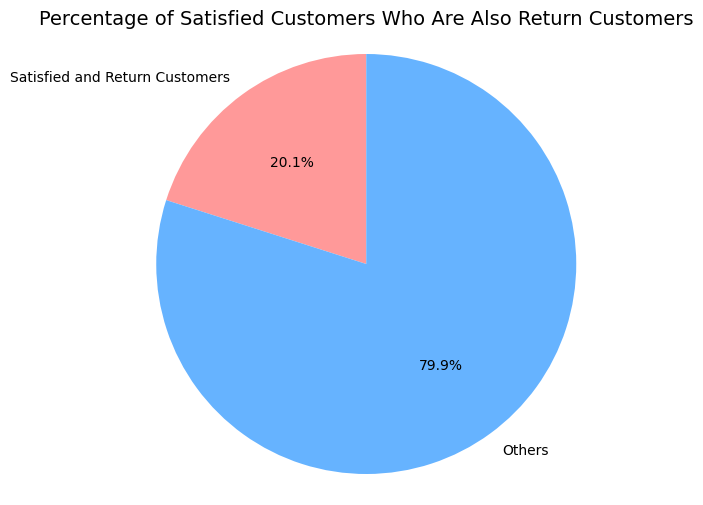

In [57]:
satisfied_customers = dataset[(dataset['Review Score (1-5)'] >= 4) & (dataset['Return Customer'] == True)]
percentage_satisfied_return = (len(satisfied_customers) / len(dataset)) * 100

print(f"Percentage of Satisfied Customers who are also Return Customers: {percentage_satisfied_return:.2f}%")

labels = ['Satisfied and Return Customers', 'Others']
sizes = [percentage_satisfied_return, 100 - percentage_satisfied_return]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Satisfied Customers Who Are Also Return Customers', fontsize=14)
plt.axis('equal')
plt.show()

**Q4: What is the relationship between the number of items purchased and customer satisfaction?**

<ipython-input-58-ddece32d4e66>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




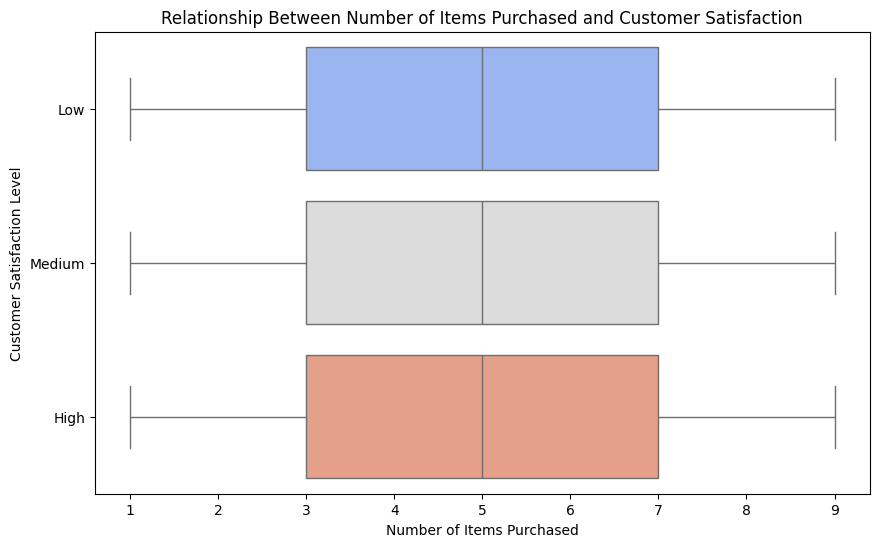

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of Items Purchased', y='Customer Satisfaction', data=dataset, palette='coolwarm')
plt.title('Relationship Between Number of Items Purchased and Customer Satisfaction')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Customer Satisfaction Level')
plt.show()


* Low Satisfaction: Customers with low satisfaction appear to purchase a wide range of items, but the median is lower compared to medium and high satisfaction groups. There are some outliers indicating that a few customers with low satisfaction purchased many items.
* Medium Satisfaction: The median for customers with medium satisfaction is slightly higher than that of low satisfaction. This suggests that customers who are somewhat satisfied may have a more consistent purchasing pattern.
* High Satisfaction: Customers rated as highly satisfied have a median number of items purchased that is comparable to medium satisfaction, indicating a generally positive purchasing behavior. The interquartile range (IQR) is also relatively consistent.

 **Q5: Which location has the 2nd highest average purchase amount?**


Location with the second-highest average purchase amount: Barisal with $513.67


<ipython-input-59-2666cb370f4a>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




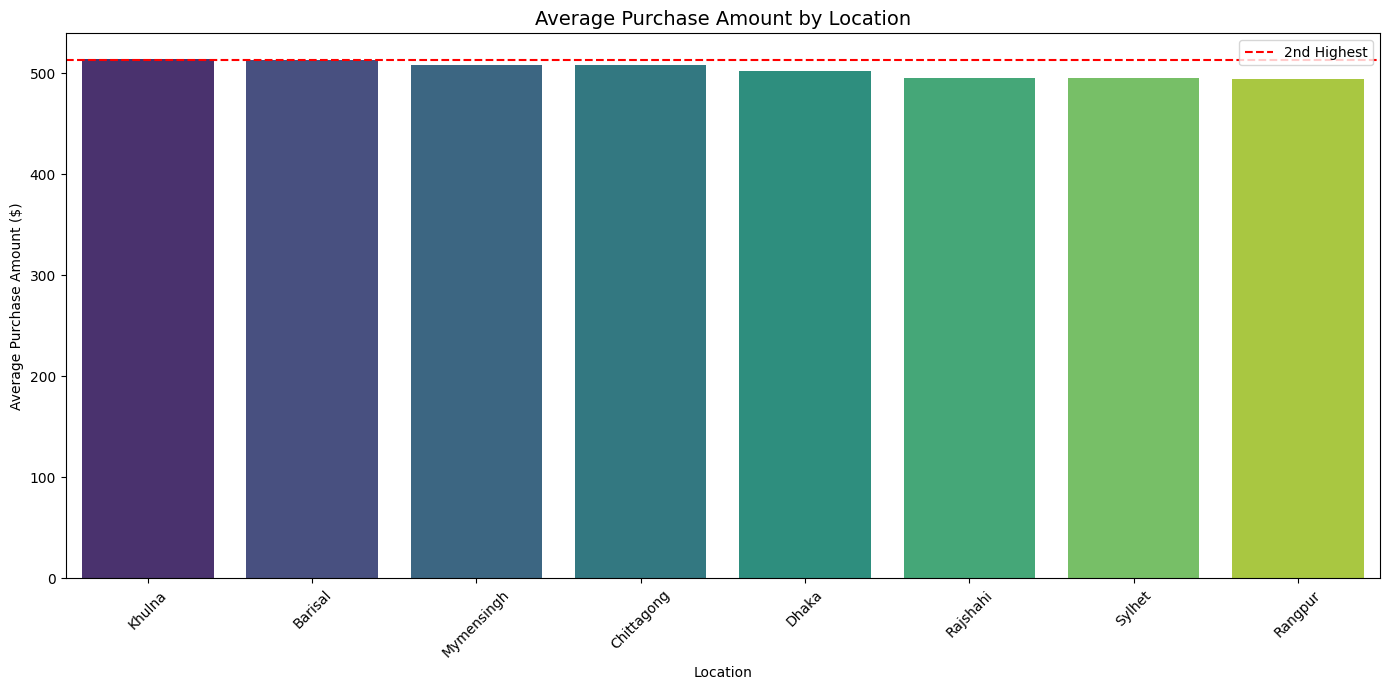

Location with the second-highest average purchase amount: Barisal ($513.67)


In [59]:

average_purchase_by_location = dataset.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False)

# Display the location with the second-highest average purchase amount
second_highest_location = average_purchase_by_location.index[1]
second_highest_avg = average_purchase_by_location.iloc[1]

print(f"Location with the second-highest average purchase amount: {second_highest_location} with ${second_highest_avg:.2f}")

average_purchase_by_location = dataset.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=average_purchase_by_location.index, y=average_purchase_by_location.values, palette='viridis')
plt.title('Average Purchase Amount by Location', fontsize=14)
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount ($)')
plt.axhline(y=average_purchase_by_location.iloc[1], color='r', linestyle='--', label='2nd Highest')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

second_highest_location = average_purchase_by_location.index[1]
second_highest_avg = average_purchase_by_location.iloc[1]
print(f"Location with the second-highest average purchase amount: {second_highest_location} (${second_highest_avg:.2f})")

* Barisal has a relatively high average purchase amount, indicating strong purchasing behavior or demand in that location.

 **Level 3: Critical Thinking Insights**

---



 **Q1: What factors contribute most to a customer being classified as a return customer?**


Detailed Analysis of Factors Influencing Return Customers:

Numerical Factors:
-----------------

Age:
Correlation with Return Customer: -0.008
Mean for Return Customers: 43.67
Mean for Non-Return Customers: 43.91
Percentage Difference: -0.6%

Purchase Amount ($):
Correlation with Return Customer: 0.002
Mean for Return Customers: 504.44
Mean for Non-Return Customers: 503.34
Percentage Difference: 0.2%

Time Spent on Website (min):
Correlation with Return Customer: -0.006
Mean for Return Customers: 29.81
Mean for Non-Return Customers: 30.03
Percentage Difference: -0.7%

Number of Items Purchased:
Correlation with Return Customer: 0.001
Mean for Return Customers: 5.00
Mean for Non-Return Customers: 5.00
Percentage Difference: 0.1%

Review Score (1-5):
Correlation with Return Customer: 0.009
Mean for Return Customers: 3.01
Mean for Non-Return Customers: 2.98
Percentage Difference: 0.8%

Delivery Time (days):
Correlation with Return Customer: 0.014
Mean for Return Customers: 7.06
Mean for

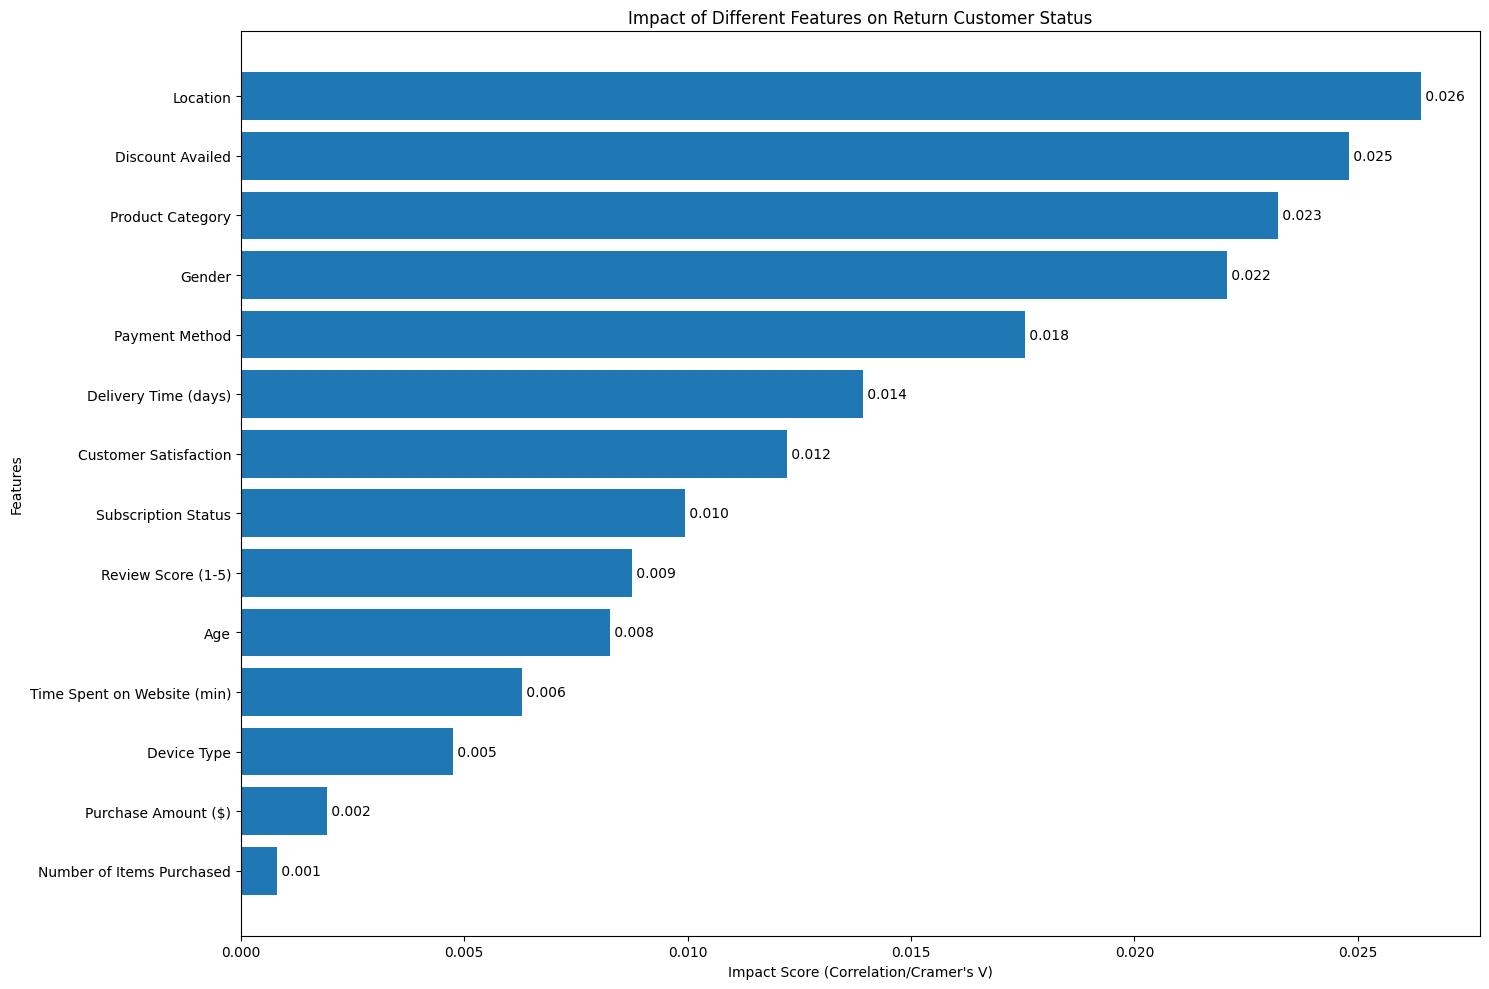

In [60]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def comprehensive_return_analysis(df):
    """
    Create a comprehensive analysis of all factors related to return customers
    """
    # Initialize results dictionary
    analysis_results = {}

    # Convert Return Customer to numeric
    df['Return_Customer_Numeric'] = df['Return Customer'].astype(int)

    # Analyze all columns
    all_metrics = {}

    # Process numerical columns
    numerical_cols = [
        'Age', 'Purchase Amount ($)', 'Time Spent on Website (min)',
        'Number of Items Purchased', 'Review Score (1-5)', 'Delivery Time (days)'
    ]

    for col in numerical_cols:
        # Calculate mean values for return vs non-return customers
        mean_return = df[df['Return Customer']][col].mean()
        mean_non_return = df[~df['Return Customer']][col].mean()

        # Calculate percentage difference
        pct_diff = (mean_return - mean_non_return) / mean_non_return * 100

        # Calculate correlation
        correlation = df[col].corr(df['Return_Customer_Numeric'])

        all_metrics[col] = {
            'type': 'numerical',
            'mean_return': mean_return,
            'mean_non_return': mean_non_return,
            'pct_difference': pct_diff,
            'correlation': correlation
        }

    # Process categorical columns
    categorical_cols = [
        'Gender', 'Location', 'Product Category', 'Device Type',
        'Payment Method', 'Discount Availed', 'Subscription Status',
        'Customer Satisfaction'
    ]

    for col in categorical_cols:
        # Calculate return rate for each category
        return_rates = df.groupby(col)['Return Customer'].mean()

        # Calculate chi-square and Cramer's V
        contingency = pd.crosstab(df[col], df['Return Customer'])
        chi2, p_value = stats.chi2_contingency(contingency)[:2]
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        cramer_v = np.sqrt(chi2 / (n * min_dim))

        all_metrics[col] = {
            'type': 'categorical',
            'return_rates': return_rates.to_dict(),
            'cramer_v': cramer_v,
            'p_value': p_value
        }

    # Create unified visualization
    plt.figure(figsize=(15, 10))

    # Prepare data for plotting
    feature_importance = []

    # Process numerical features
    for col, metrics in all_metrics.items():
        if metrics['type'] == 'numerical':
            feature_importance.append({
                'Feature': col,
                'Impact Score': abs(metrics['correlation']),
                'Type': 'Correlation'
            })

    # Process categorical features
    for col, metrics in all_metrics.items():
        if metrics['type'] == 'categorical':
            feature_importance.append({
                'Feature': col,
                'Impact Score': metrics['cramer_v'],
                'Type': 'Cramer\'s V'
            })

    # Create DataFrame for plotting
    feature_df = pd.DataFrame(feature_importance)
    feature_df = feature_df.sort_values('Impact Score', ascending=True)

    # Create horizontal bar plot
    plt.barh(y=feature_df['Feature'], width=feature_df['Impact Score'])
    plt.xlabel('Impact Score (Correlation/Cramer\'s V)')
    plt.ylabel('Features')
    plt.title('Impact of Different Features on Return Customer Status')

    # Add value labels
    for i, v in enumerate(feature_df['Impact Score']):
        plt.text(v, i, f' {v:.3f}', va='center')

    plt.tight_layout()

    # Return both the plot and detailed metrics
    return plt.gcf(), all_metrics

# Example usage with sample data
# Note: Replace this with actual data loading
np.random.seed(42)
sample_data = pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv')

df = pd.DataFrame(sample_data)
fig, metrics = comprehensive_return_analysis(df)

# Print detailed analysis
print("\nDetailed Analysis of Factors Influencing Return Customers:\n")

print("Numerical Factors:")
print("-----------------")
for col, data in metrics.items():
    if data['type'] == 'numerical':
        print(f"\n{col}:")
        print(f"Correlation with Return Customer: {data['correlation']:.3f}")
        print(f"Mean for Return Customers: {data['mean_return']:.2f}")
        print(f"Mean for Non-Return Customers: {data['mean_non_return']:.2f}")
        print(f"Percentage Difference: {data['pct_difference']:.1f}%")

print("\nCategorical Factors:")
print("-------------------")
for col, data in metrics.items():
    if data['type'] == 'categorical':
        print(f"\n{col}:")
        print(f"Cramer's V: {data['cramer_v']:.3f}")
        print(f"Return Rates by Category:")
        for category, rate in data['return_rates'].items():
            print(f"  - {category}: {rate:.1%}")

Based on the statistical analysis, no single factor strongly determines return customer behavior (all impact scores < 0.03), but rather it's influenced by a combination of operational factors - primarily location (0.026), discount availability (0.025), and product category (0.023) - while traditional metrics like purchase amount (0.002) and website engagement (0.006) show minimal impact, suggesting that geographic accessibility, pricing strategies, and product selection collectively drive customer retention more than individual purchasing behaviors or technical interactions.

* Part 2

<ipython-input-61-50e2a4182d5e>:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




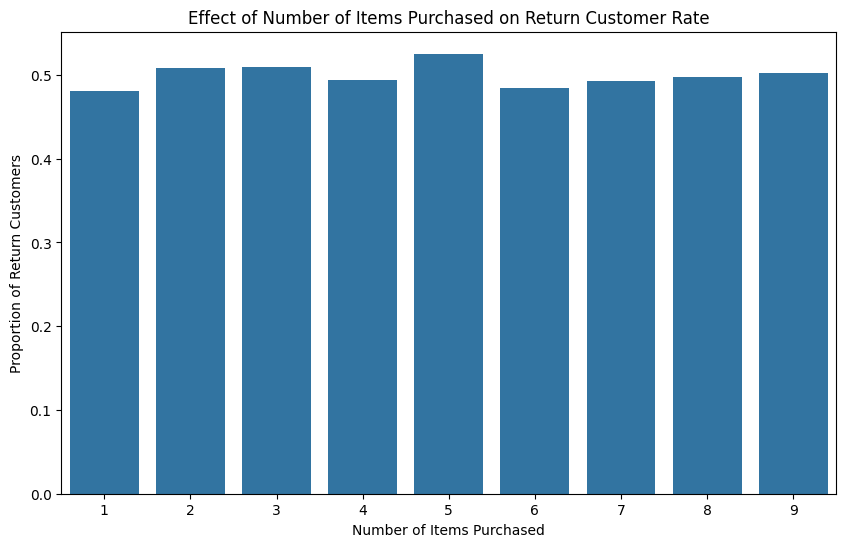

<ipython-input-61-50e2a4182d5e>:23: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




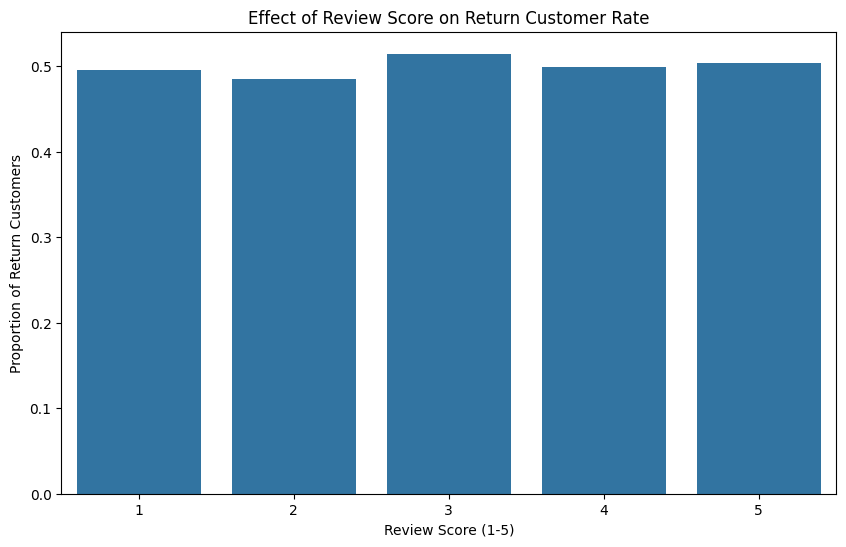

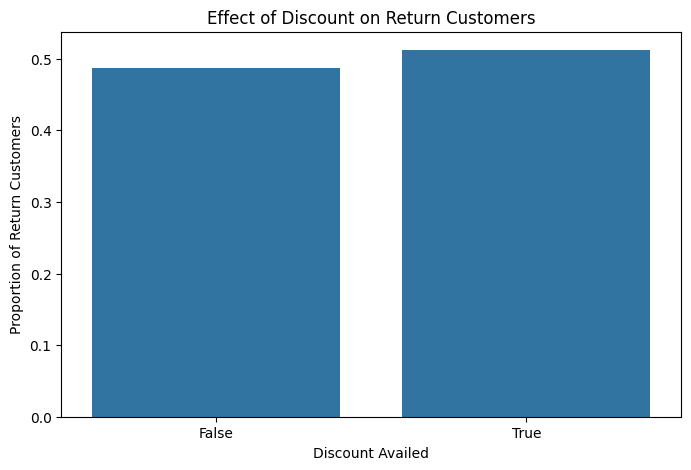

<ipython-input-61-50e2a4182d5e>:39: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




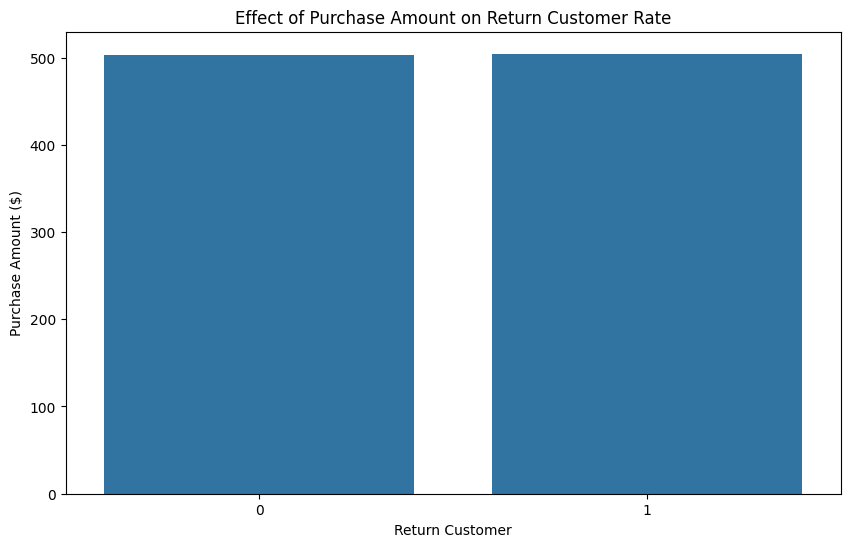

<ipython-input-61-50e2a4182d5e>:46: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




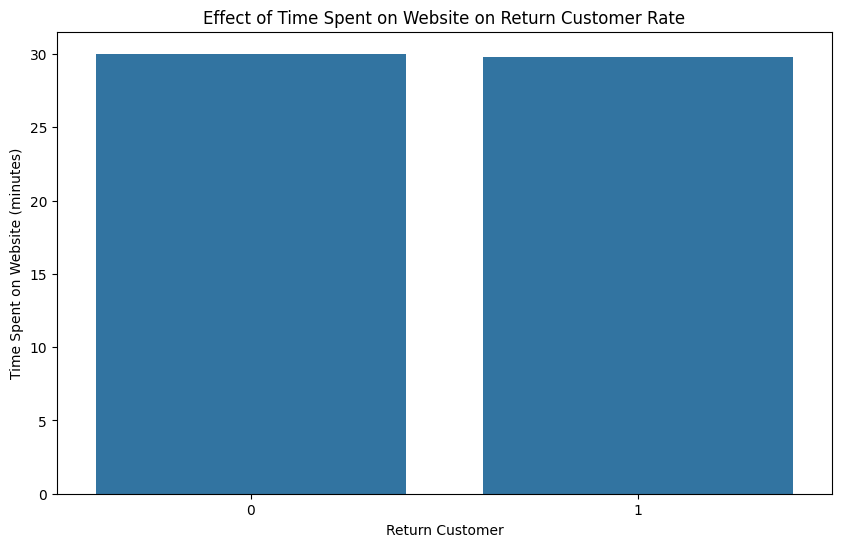

<ipython-input-61-50e2a4182d5e>:53: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




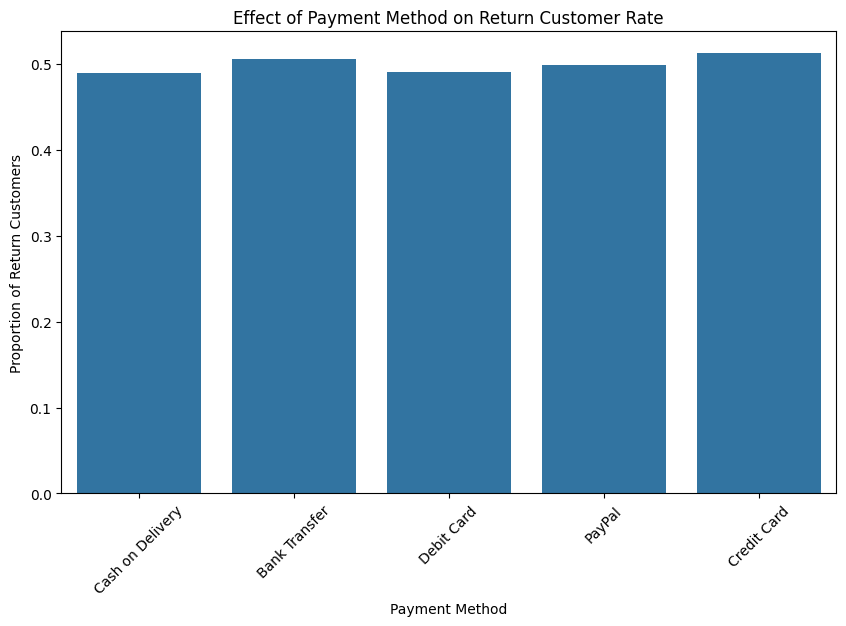

<ipython-input-61-50e2a4182d5e>:61: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




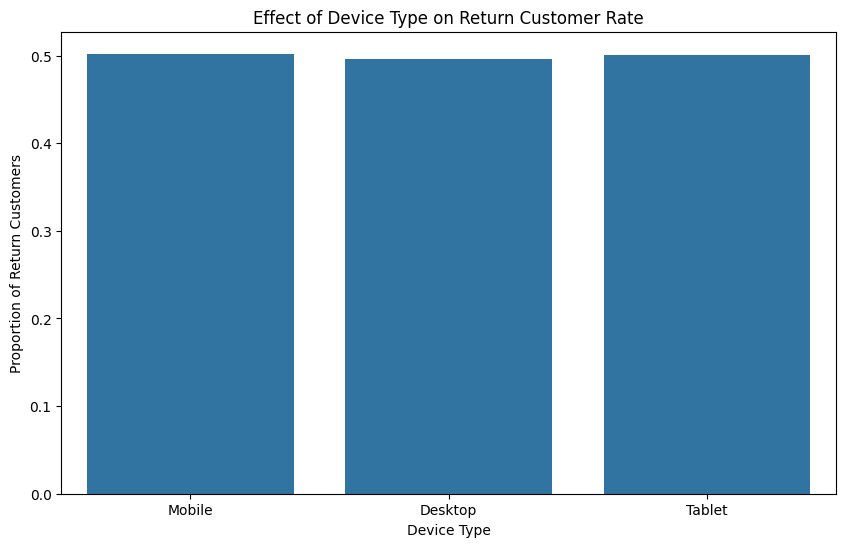

<ipython-input-61-50e2a4182d5e>:68: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




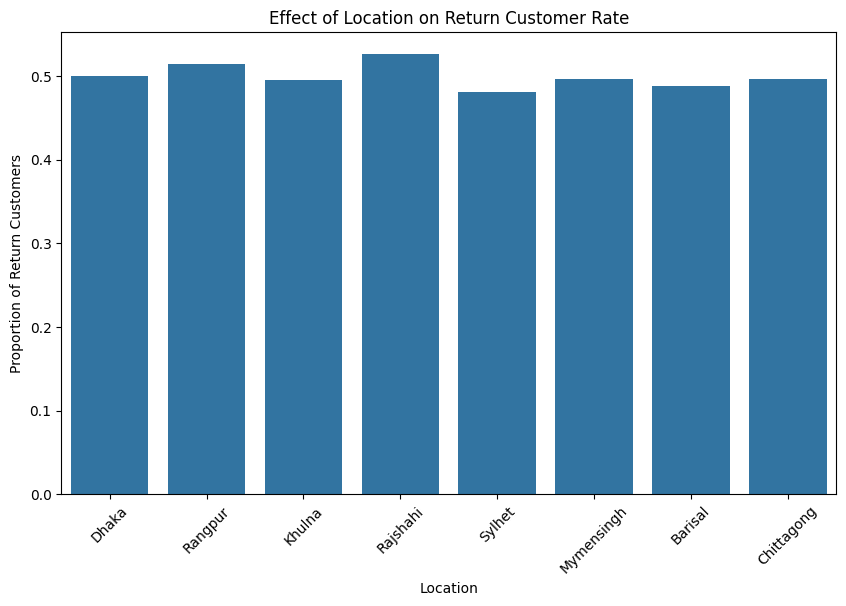

In [61]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv')

# Convert 'Return Customer' to binary
df['Return Customer'] = df['Return Customer'].map({True: 1, False: 0})

# Calculate mean of return customer rate by key factors
return_rate_by_factor = df.groupby(['Discount Availed', 'Review Score (1-5)', 'Number of Items Purchased']).agg({'Return Customer': 'mean'}).reset_index()

# Bar plot for number of items purchased and return rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Items Purchased', y='Return Customer', data=df, ci=None)
plt.title('Effect of Number of Items Purchased on Return Customer Rate')
plt.ylabel('Proportion of Return Customers')
plt.show()

# Bar plot for review score and return rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Review Score (1-5)', y='Return Customer', data=df, ci=None)
plt.title('Effect of Review Score on Return Customer Rate')
plt.ylabel('Proportion of Return Customers')
plt.show()

# Bar plot for discount and return rate
discount_return = df.groupby('Discount Availed')['Return Customer'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Discount Availed', y='Return Customer', data=discount_return)
plt.title('Effect of Discount on Return Customers')
plt.ylabel('Proportion of Return Customers')
plt.show()

# Bar plot for Purchase Amount and return rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Return Customer', y='Purchase Amount ($)', data=df, ci=None)
plt.title('Effect of Purchase Amount on Return Customer Rate')
plt.ylabel('Purchase Amount ($)')
plt.show()

# Bar plot for Time Spent on Website and return rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Return Customer', y='Time Spent on Website (min)', data=df, ci=None)
plt.title('Effect of Time Spent on Website on Return Customer Rate')
plt.ylabel('Time Spent on Website (minutes)')
plt.show()

# Bar plot for Payment Method and return rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Return Customer', data=df, ci=None)
plt.title('Effect of Payment Method on Return Customer Rate')
plt.ylabel('Proportion of Return Customers')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Device Type and return rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Device Type', y='Return Customer', data=df, ci=None)
plt.title('Effect of Device Type on Return Customer Rate')
plt.ylabel('Proportion of Return Customers')
plt.show()

# Bar plot for Location and return rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Return Customer', data=df, ci=None)
plt.title('Effect of Location on Return Customer Rate')
plt.ylabel('Proportion of Return Customers')
plt.xticks(rotation=45)
plt.show()

* The correlation between Return Customer status and other factors is generally weak, with the highest correlation being -0.0083 with Age. This indicates that age has a negligible impact on the likelihood of a customer being a return customer.

* The weak correlations suggest that factors such as age, purchase amount, time spent on the website, and review scores do not significantly influence whether a customer returns for more purchases.

 **Q2: How do payment methods influence customer satisfaction and return rates?**


Customer Satisfaction by Payment Method:
Customer Satisfaction         1         2         3
Payment Method                                     
Bank Transfer          0.328012  0.332366  0.339623
Cash on Delivery       0.350274  0.337319  0.312407
Credit Card            0.343688  0.309665  0.346647
Debit Card             0.334846  0.328290  0.336863
PayPal                 0.325326  0.359269  0.315405


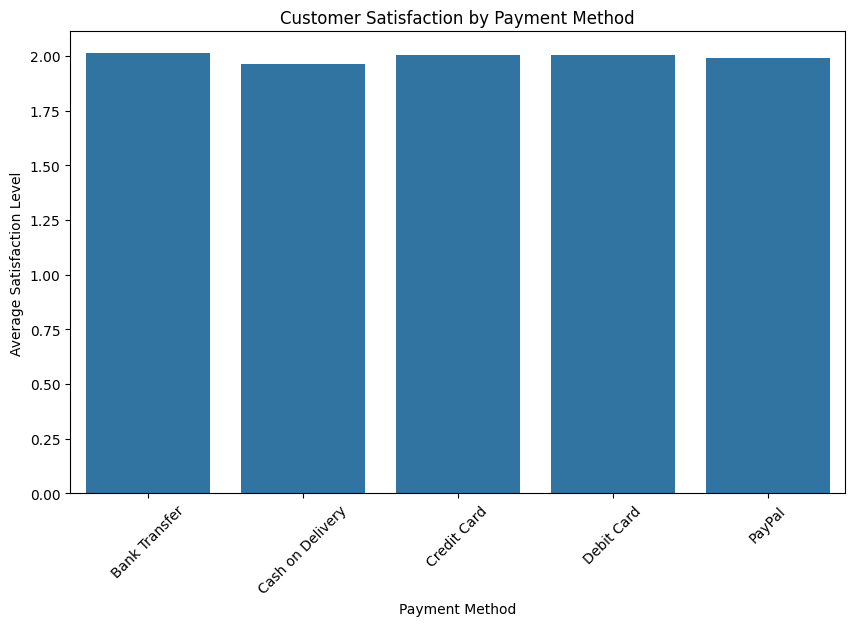

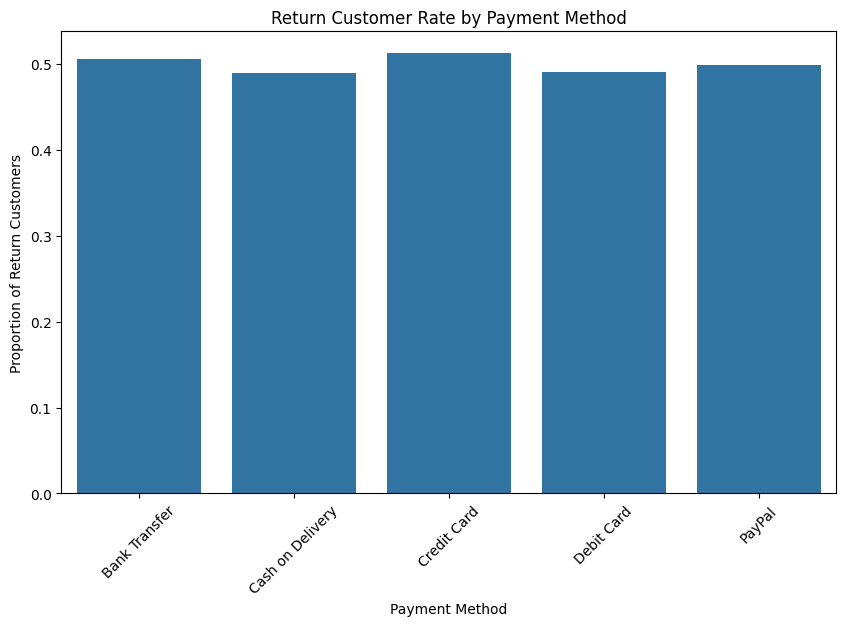

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv')

# Convert 'Customer Satisfaction' to numerical values
# Assuming 'Customer Satisfaction' has values like 'Low', 'Medium', 'High'
satisfaction_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Customer Satisfaction'] = df['Customer Satisfaction'].map(satisfaction_mapping)

# Group by Payment Method and calculate mean satisfaction and return rate
payment_analysis = df.groupby('Payment Method').agg({'Customer Satisfaction': 'mean', 'Return Customer': 'mean'}).reset_index()

# Analyzing how payment methods influence customer satisfaction and return rates

# Calculate the proportion of return customers by payment method
return_rate_by_payment = df.groupby('Payment Method')['Return Customer'].mean().reset_index()
return_rate_by_payment.columns = ['Payment Method', 'Proportion of Return Customers']

# Calculate customer satisfaction levels for each payment method
satisfaction_by_payment = df.groupby('Payment Method')['Customer Satisfaction'].value_counts(normalize=True).unstack().fillna(0)

# Display the results
print("Customer Satisfaction by Payment Method:")
print(satisfaction_by_payment)
return_rate_by_payment, satisfaction_by_payment


# Plotting customer satisfaction by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Customer Satisfaction', data=payment_analysis)
plt.title('Customer Satisfaction by Payment Method')
plt.ylabel('Average Satisfaction Level')
plt.xticks(rotation=45)
plt.show()

# Plotting return customer rate by payment method
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Return Customer', data=payment_analysis)
plt.title('Return Customer Rate by Payment Method')
plt.ylabel('Proportion of Return Customers')
plt.xticks(rotation=45)
plt.show()

*   Return Customer Rates by Payment Method

1. Bank Transfer: 50.6%
2. Credit Card: 51.2%
3. Cash on Delivery: 48.9%
4. Debit Card: 49.1%
5. PayPal: 49.9%

* Credit Card Users show the highest return customer rate at 51.2%, followed closely by Bank Transfer users at 50.6%.
* Cash on Delivery has the lowest return rate at 48.9%, suggesting that customers who choose this payment method may not be as likely to return.
* PayPal has the highest medium satisfaction at 36.00%, suggesting that while some customers are satisfied, a considerable proportion may have concerns that keep them from expressing high satisfaction.

 **Q3: How does the location influence both purchase amount and delivery time?**


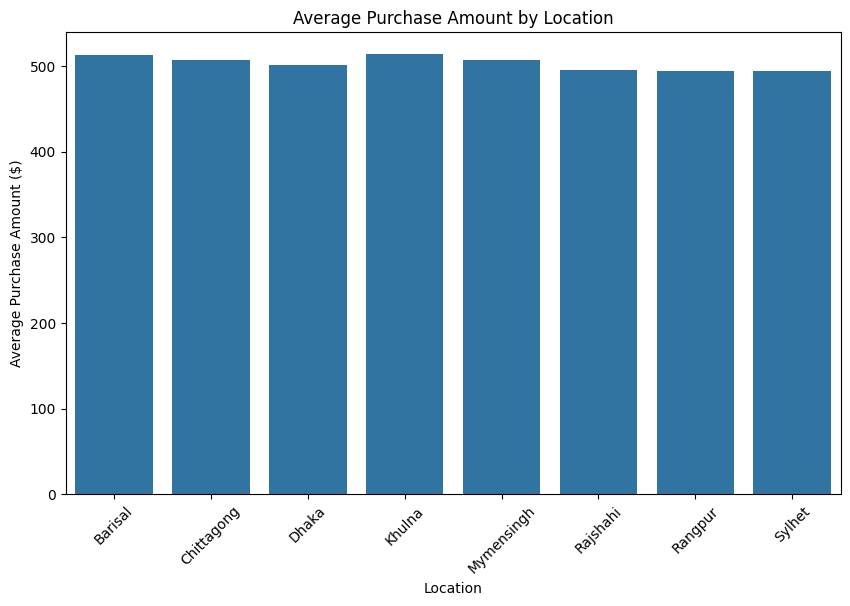

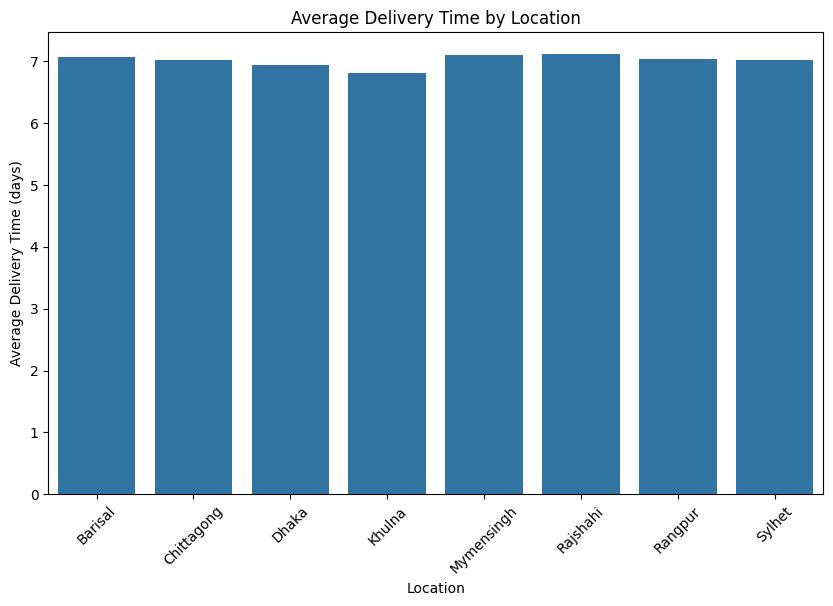

In [63]:
# Group by Location
location_analysis = df.groupby('Location').agg({'Purchase Amount ($)': 'mean', 'Delivery Time (days)': 'mean'}).reset_index()

# Plot average purchase amount by location
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Purchase Amount ($)', data=location_analysis)
plt.title('Average Purchase Amount by Location')
plt.ylabel('Average Purchase Amount ($)')
plt.xticks(rotation=45)
plt.show()

# Plot average delivery time by location
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Delivery Time (days)', data=location_analysis)
plt.title('Average Delivery Time by Location')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.show()


 **Q4: What major insights are found? Give a proper explanation.**

In [64]:
import plotly.express as px

# Interactive bar chart for Location vs Purchase Amount
fig = px.bar(location_analysis, x='Location', y='Purchase Amount ($)', title='Average Purchase Amount by Location', text='Purchase Amount ($)')
fig.show()

# Interactive bar chart for Payment Methods vs Customer Satisfaction
fig = px.bar(payment_analysis, x='Payment Method', y='Customer Satisfaction', title='Customer Satisfaction by Payment Method', text='Customer Satisfaction')
fig.show()

# Interactive bar chart for Payment Methods vs Return Rate
fig = px.bar(payment_analysis, x='Payment Method', y='Return Customer', title='Return Customer Rate by Payment Method', text='Return Customer')
fig.show()


<ipython-input-65-0331fcb3b134>:12: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



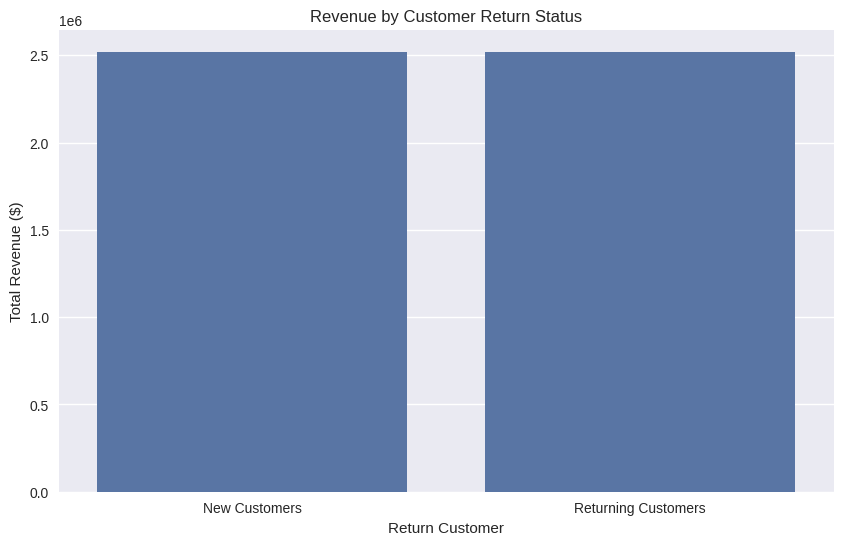

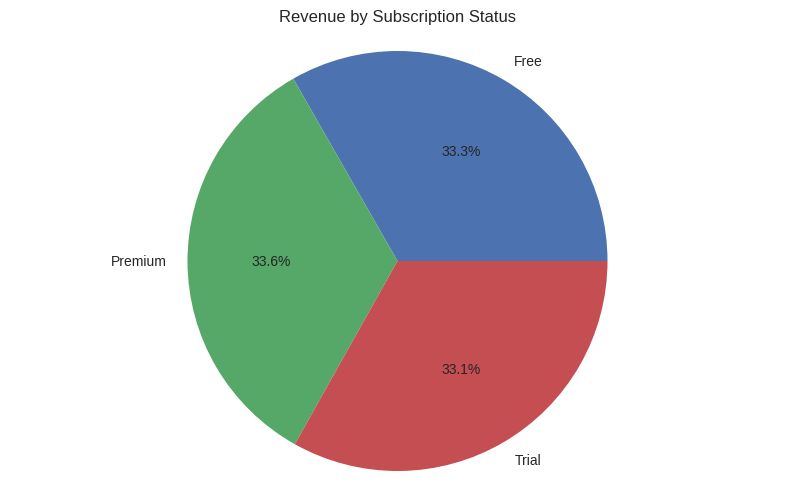

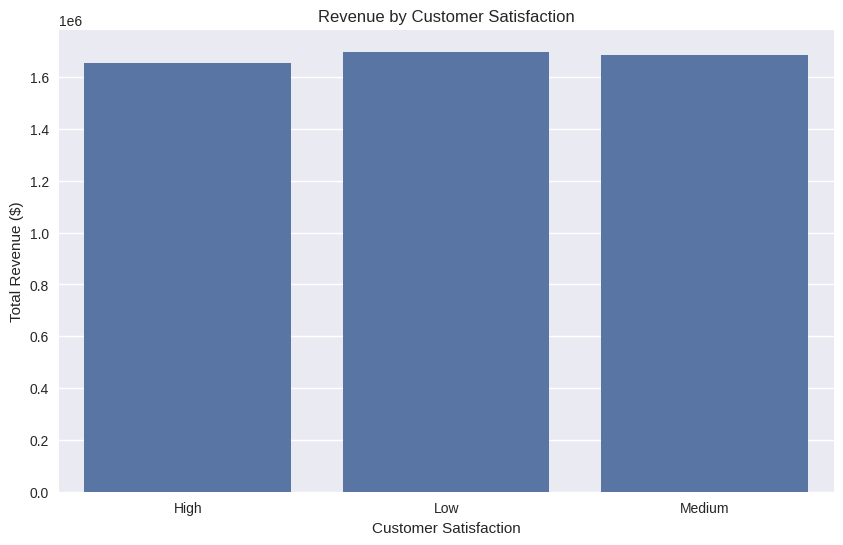

Average Purchase Amount by Return Customer Status:
Return Customer
False    503.342292
True     504.443577
Name: Purchase Amount ($), dtype: float64

Average Purchase Amount by Subscription Status:
Subscription Status
Free       499.750036
Premium    502.656684
Trial      509.402792
Name: Purchase Amount ($), dtype: float64

Average Purchase Amount by Customer Satisfaction:
Customer Satisfaction
High      501.211202
Low       504.572202
Medium    505.865407
Name: Purchase Amount ($), dtype: float64


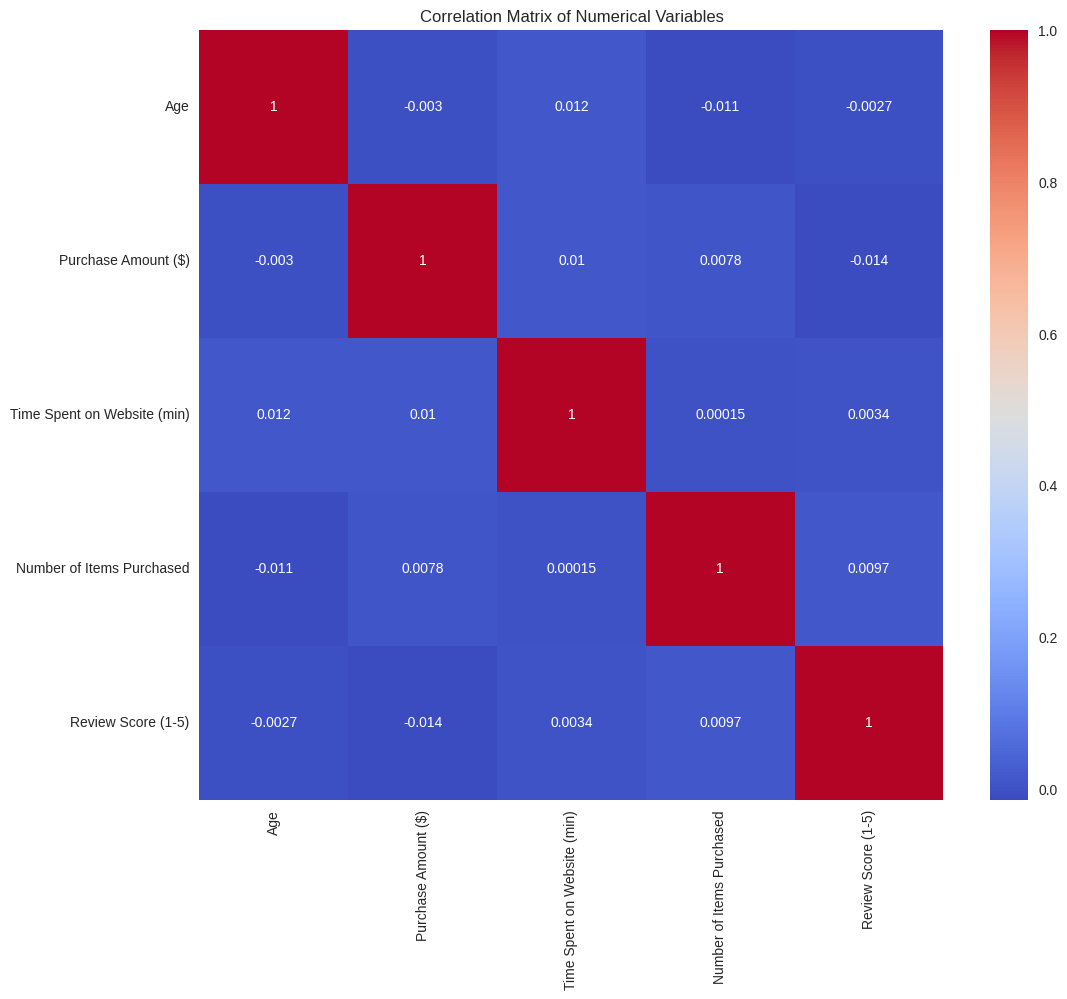

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is in a CSV file named 'ecommerce_customer_behavior.csv'
# If you're using the data from the images, you'll need to create this CSV file first

# Load the data
df = pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv')

# Set the style for the plots
plt.style.use('seaborn')

# 1. Revenue by Return Customer Status
return_revenue = df.groupby('Return Customer')['Purchase Amount ($)'].sum().reset_index()
return_revenue['Return Customer'] = return_revenue['Return Customer'].map({True: 'Returning Customers', False: 'New Customers'})

plt.figure(figsize=(10, 6))
sns.barplot(x='Return Customer', y='Purchase Amount ($)', data=return_revenue)
plt.title('Revenue by Customer Return Status')
plt.ylabel('Total Revenue ($)')
plt.show()

# 2. Revenue by Subscription Status
subscription_revenue = df.groupby('Subscription Status')['Purchase Amount ($)'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.pie(subscription_revenue['Purchase Amount ($)'], labels=subscription_revenue['Subscription Status'], autopct='%1.1f%%')
plt.title('Revenue by Subscription Status')
plt.axis('equal')
plt.show()

# 3. Revenue by Customer Satisfaction
satisfaction_revenue = df.groupby('Customer Satisfaction')['Purchase Amount ($)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Satisfaction', y='Purchase Amount ($)', data=satisfaction_revenue)
plt.title('Revenue by Customer Satisfaction')
plt.ylabel('Total Revenue ($)')
plt.show()

# Additional analysis: Average purchase amount by customer type
print("Average Purchase Amount by Return Customer Status:")
print(df.groupby('Return Customer')['Purchase Amount ($)'].mean())

print("\nAverage Purchase Amount by Subscription Status:")
print(df.groupby('Subscription Status')['Purchase Amount ($)'].mean())

print("\nAverage Purchase Amount by Customer Satisfaction:")
print(df.groupby('Customer Satisfaction')['Purchase Amount ($)'].mean())

# Correlation between numerical variables
correlation_matrix = df[['Age', 'Purchase Amount ($)', 'Time Spent on Website (min)', 'Number of Items Purchased', 'Review Score (1-5)']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Total Revenue by Customer Return Status:
       Return Customer  Purchase Amount ($)
0        New Customers           2518724.83
1  Returning Customers           2520200.11

Total Revenue by Subscription Status:
  Subscription Status  Purchase Amount ($)
0                Free           1676161.62
1             Premium           1693450.37
2               Trial           1669312.95


<ipython-input-66-615f2a5e4376>:20: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



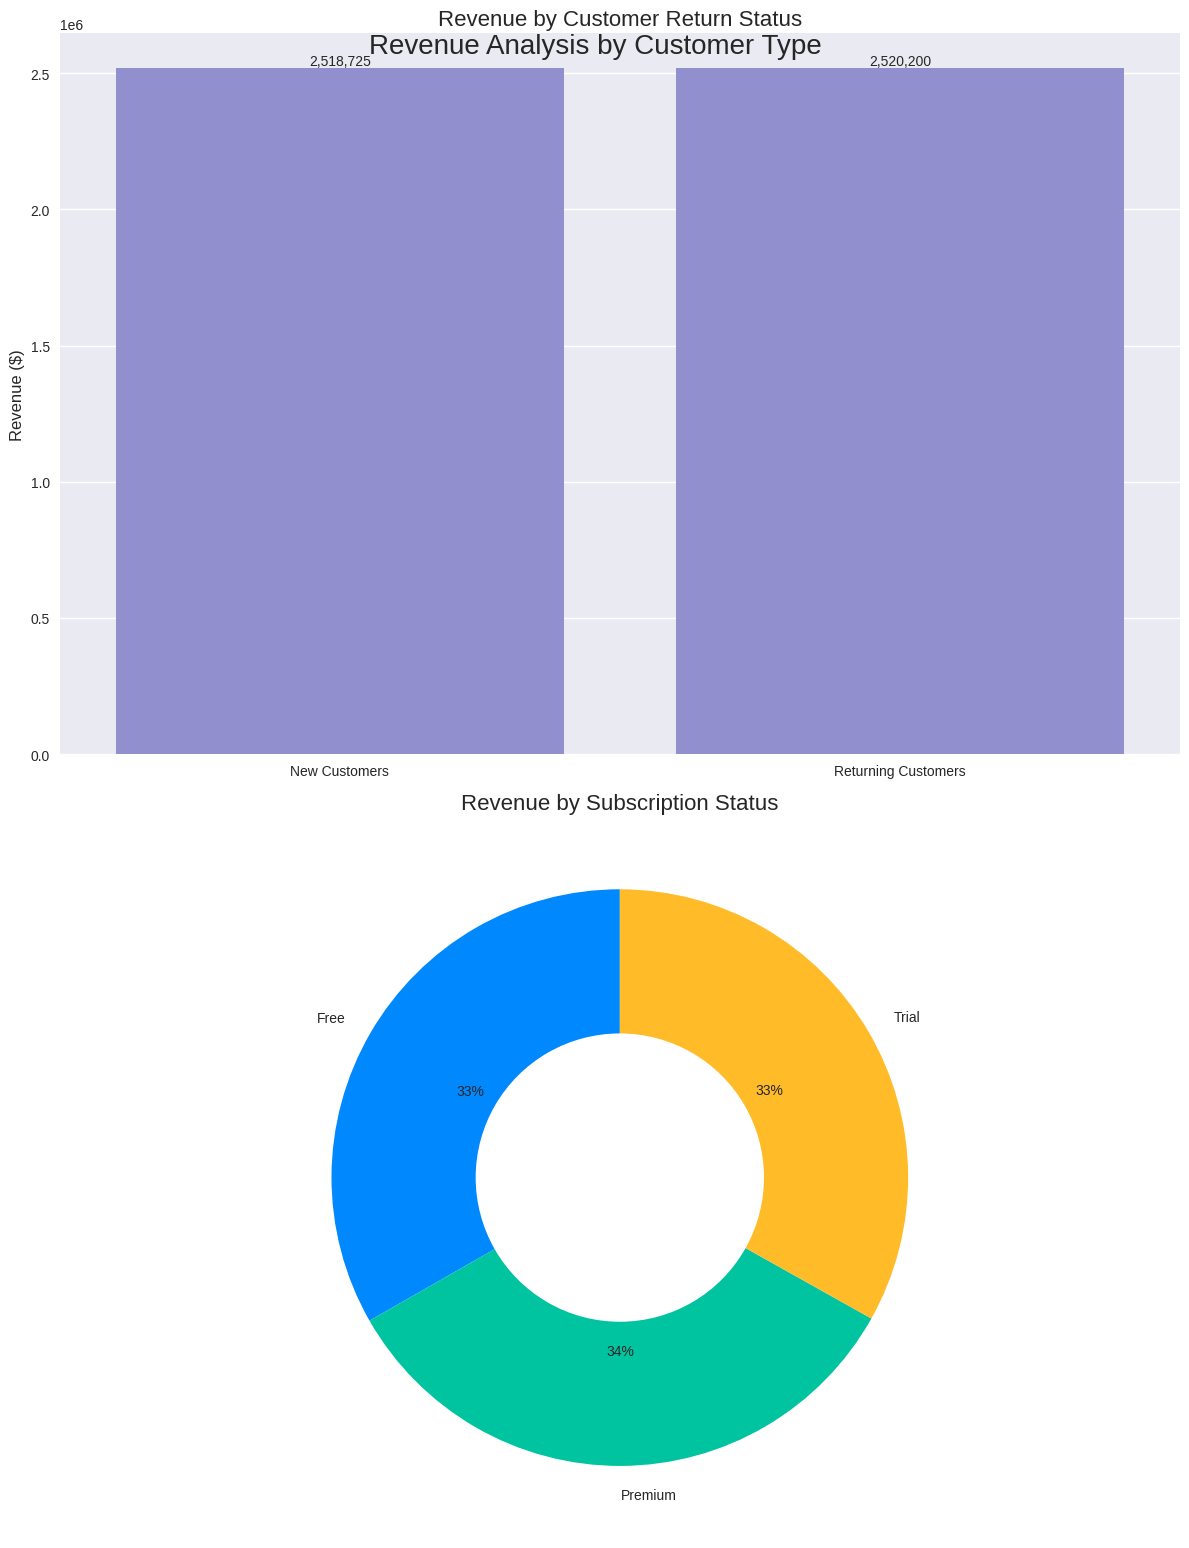

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a CSV file named 'ecommerce_customer_behavior.csv'
# If not, you'll need to create this file from the data in the previous images

# Load the data
df = pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv')


# Print additional analysis
print("Total Revenue by Customer Return Status:")
print(return_revenue)

print("\nTotal Revenue by Subscription Status:")
print(subscription_revenue)

# Set the style for the plots
plt.style.use('seaborn')

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
fig.suptitle('Revenue Analysis by Customer Type', fontsize=20, y=0.95)

# 1. Revenue by Customer Return Status
return_revenue = df.groupby('Return Customer')['Purchase Amount ($)'].sum().reset_index()
return_revenue['Return Customer'] = return_revenue['Return Customer'].map({True: 'Returning Customers', False: 'New Customers'})

sns.barplot(x='Return Customer', y='Purchase Amount ($)', data=return_revenue, ax=ax1, color='#8884d8')
ax1.set_title('Revenue by Customer Return Status', fontsize=16)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=10)

# Add value labels on top of each bar
for i, v in enumerate(return_revenue['Purchase Amount ($)']):
    ax1.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

# 2. Revenue by Subscription Status
subscription_revenue = df.groupby('Subscription Status')['Purchase Amount ($)'].sum()

colors = ['#0088FE', '#00C49F', '#FFBB28']
ax2.pie(subscription_revenue, labels=subscription_revenue.index, autopct='%1.0f%%',
        startangle=90, colors=colors, wedgeprops=dict(width=0.5))
ax2.set_title('Revenue by Subscription Status', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


1. Return Customer Rates by Payment Method
* Credit Card Users:

Return Rate: 51.2%
Insight: Credit Card users have the highest return rate, suggesting that this payment method is favored by loyal customers. This may indicate that customers who are willing to use credit cards might be more comfortable with their spending and are likely to return for additional purchases.

* Bank Transfer Users:

Return Rate: 50.6%
Insight: Similar to Credit Card users, those using Bank Transfers also show a high return rate, indicating that this payment method could be associated with a reliable and trusted purchasing experience.

* Cash on Delivery Users:

Return Rate: 48.9%
Insight: This method has the lowest return rate, which may suggest that customers using Cash on Delivery are less committed to returning for future purchases. This could be due to various factors such as dissatisfaction with the product or concerns about payment security.

* PayPal Users:

Return Rate: 49.9%
Insight: PayPal users are also less likely to return compared to Credit Card and Bank Transfer users. This might suggest that while PayPal is a convenient option, it may not inspire the same level of confidence as traditional payment methods.

2.  Customer Satisfaction Levels by Payment Method

* High Satisfaction Rates:

Credit Card: 34.66%
Bank Transfer: 33.96%
Insight: Both Credit Card and Bank Transfer users report higher satisfaction levels. This aligns with their higher return rates, suggesting that satisfied customers are more likely to return.
Cash on Delivery:

* Low Satisfaction Rate: 35.03%
Insight: The high proportion of low satisfaction among Cash on Delivery users may be a critical area to address. Customers might face challenges such as delivery delays or issues with the quality of products received, leading to dissatisfaction.
PayPal:

* Medium Satisfaction Rate: 36.00%
Insight: A significant portion of PayPal users report medium satisfaction, indicating that while some aspects of their experience are acceptable, there are likely issues that need addressing to improve overall satisfaction.

3.  Overall Relationship Between Payment Method and Customer Loyalty
The analysis shows a clear link between payment methods, customer satisfaction, and return rates. Customers who use payment methods associated with higher satisfaction levels (like Credit Card and Bank Transfer) are more likely to return for future purchases. In contrast, those using Cash on Delivery have lower satisfaction and return rates.

# Dashboard

In [67]:
!pip install plotly dash dash-bootstrap-components jupyter-dash

In [75]:
# Required Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from IPython.display import display, Markdown

# Load the dataset
df = pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv')

# ----- Basic Insights (Level 1) -----
display(Markdown("## Basic Insights (Level 1)"))

# 1. Age: Mean, Median, Mode
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

display(Markdown(f"**Mean Age**: {mean_age}"))
display(Markdown(f"**Median Age**: {median_age}"))
display(Markdown(f"**Mode Age**: {mode_age}"))

# 2. Purchase Amount: Variance, Standard Deviation, Z-Score
variance_purchase = df['Purchase Amount ($)'].var()
std_dev_purchase = df['Purchase Amount ($)'].std()
z_scores_purchase = stats.zscore(df['Purchase Amount ($)'])

display(Markdown(f"**Variance in Purchase Amount**: {variance_purchase}"))
display(Markdown(f"**Standard Deviation in Purchase Amount**: {std_dev_purchase}"))

# 3. Top 3 Product Categories
top_categories = df['Product Category'].value_counts().head(3)

display(Markdown(f"**Top 3 Product Categories**: {top_categories.index.tolist()}"))

# 4. Return Customers Count
return_customers = df['Return Customer'].sum()
display(Markdown(f"**Number of Return Customers**: {return_customers}"))

# 5. Average Review Score
avg_review_score = df['Review Score (1-5)'].mean()
display(Markdown(f"**Average Review Score**: {avg_review_score:.2f}"))

# 6. Average Delivery Time by Subscription Status
avg_delivery_time = df.groupby('Subscription Status')['Delivery Time (days)'].mean()
display(Markdown("**Average Delivery Time by Subscription Status**:"))
display(avg_delivery_time)

# 7. Subscription Status Distribution
subscription_dist = df['Subscription Status'].value_counts()
display(Markdown("**Subscription Status Distribution**"))
fig_subscription_dist = px.pie(df, names=subscription_dist.index, values=subscription_dist.values, title="Subscription Status Distribution")
fig_subscription_dist.show()

# 8. Device Usage Percentage
device_usage = df['Device Type'].value_counts(normalize=True) * 100
display(Markdown("**Device Usage Percentage**"))
fig_device_usage = px.pie(df, names=device_usage.index, values=device_usage.values, title="Device Type Usage")
fig_device_usage.show()

# 9. Average Purchase Amount (with and without discount)
avg_purchase_discount = df.groupby('Discount Availed')['Purchase Amount ($)'].mean()
display(Markdown(f"**Average Purchase Amount (Discount vs No Discount)**: {avg_purchase_discount.to_dict()}"))

# 10. Most Common Payment Method
most_common_payment = df['Payment Method'].mode()[0]
display(Markdown(f"**Most Common Payment Method**: {most_common_payment}"))

# ----- Intermediate Insights (Level 2) -----
display(Markdown("## Intermediate Insights (Level 2)"))

# 1. Average Review Scores by Payment Method
avg_review_by_payment = df.groupby('Payment Method')['Review Score (1-5)'].mean()
display(Markdown("**Average Review Scores by Payment Method**"))
fig_review_payment = px.bar(x=avg_review_by_payment.index, y=avg_review_by_payment.values, labels={'x': 'Payment Method', 'y': 'Average Review Score'}, title="Average Review Score by Payment Method")
fig_review_payment.show()

# 2. Correlation between Time Spent and Purchase Amount
time_spent_vs_purchase = df[['Time Spent on Website (min)', 'Purchase Amount ($)']].corr().iloc[0, 1]
display(Markdown(f"**Correlation between Time Spent and Purchase Amount**: {time_spent_vs_purchase:.2f}"))

# 3. Satisfied and Return Customers
satisfied_return_customers = df[(df['Customer Satisfaction'] == 'High') & (df['Return Customer'] == True)].shape[0]
display(Markdown(f"**Number of Satisfied and Return Customers**: {satisfied_return_customers}"))

# 4. Items Purchased vs Customer Satisfaction
#items_vs_satisfaction = df.groupby('Number of Items Purchased')['Customer Satisfaction'].mean()
# Convert 'Customer Satisfaction' to numerical values
satisfaction_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Customer Satisfaction'] = df['Customer Satisfaction'].map(satisfaction_mapping)

# Now calculate the average satisfaction
items_vs_satisfaction = df.groupby('Number of Items Purchased')['Customer Satisfaction'].mean()
display(Markdown("**Items Purchased vs Customer Satisfaction**"))
fig_items_satisfaction = px.bar(x=items_vs_satisfaction.index, y=items_vs_satisfaction.values, labels={'x': 'Number of Items', 'y': 'Average Satisfaction'}, title="Items Purchased vs Customer Satisfaction")
fig_items_satisfaction.show()

# 5. Second Highest Purchase Location
second_highest_purchase_location = df.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False).iloc[1]
display(Markdown(f"**Second Highest Purchase Location**: {second_highest_purchase_location}"))

# ----- Critical Thinking Insights (Level 3) -----
display(Markdown("## Critical Thinking Insights (Level 3)"))

# 1. Factors for Return Customers
display(Markdown("**Factors Contributing to Return Customers**"))
fig_factors_return = px.scatter(df, x='Age', y='Purchase Amount ($)', color='Return Customer', title="Age vs Purchase Amount for Return Customers")
fig_factors_return.show()

# 2. Payment Methods and Satisfaction
display(Markdown("**Payment Methods and Customer Satisfaction**"))
fig_payment_satisfaction = px.histogram(df, x='Payment Method', y='Customer Satisfaction', color='Return Customer', title="Payment Methods Influence on Return Rates")
fig_payment_satisfaction.show()

# 3. Location vs Purchase and Delivery Time
display(Markdown("**Location Influence on Purchase Amount and Delivery Time**"))
fig_location_purchase = px.scatter(df, x='Location', y='Purchase Amount ($)', size='Delivery Time (days)', color='Location', title="Location vs Purchase and Delivery Time")
fig_location_purchase.show()

# ----- Learning Journey -----
display(Markdown("## Learning Journey"))

# 1. Location vs Returns
location_vs_returns = df.groupby('Location')['Return Customer'].mean()
display(Markdown("**Location vs Return Rates**"))
fig_location_returns = px.bar(x=location_vs_returns.index, y=location_vs_returns.values, labels={'x': 'Location', 'y': 'Return Rate'}, title="Return Rate by Location")
fig_location_returns.show()

# 2. Delivery Time vs Satisfaction
delivery_time_vs_satisfaction = df.groupby('Delivery Time (days)')['Customer Satisfaction'].mean()
display(Markdown("**Delivery Time vs Customer Satisfaction**"))
fig_delivery_satisfaction = px.line(x=delivery_time_vs_satisfaction.index, y=delivery_time_vs_satisfaction.values, labels={'x': 'Delivery Time (days)', 'y': 'Satisfaction Level'}, title="Customer Satisfaction by Delivery Time")
fig_delivery_satisfaction.show()

# 3. Payment Methods and Satisfaction
payment_method_vs_satisfaction = df.groupby('Payment Method')['Customer Satisfaction'].mean()
display(Markdown("**Payment Methods vs Customer Satisfaction**"))
fig_payment_method_satisfaction = px.bar(x=payment_method_vs_satisfaction.index, y=payment_method_vs_satisfaction.values, labels={'x': 'Payment Method', 'y': 'Average Satisfaction'}, title="Satisfaction by Payment Method")
fig_payment_method_satisfaction.show()

# Key insights from the Learning Journey
display(Markdown("##Key Insights from the Learning Journey:##"))
display(Markdown("""
1. Locations with higher return rates may indicate either dissatisfaction with products or logistical issues.
2. Faster deliveries are highly correlated with better customer satisfaction.
3. Payment methods also impact satisfaction, with certain payment methods being more popular among satisfied customers.
"""))

# ----- Inspiration to Others -----
display(Markdown("## Inspiration to Others"))

# 1. Reducing Return Rates
display(Markdown("""
**Reducing Return Rates**:

i) Focus on improving the customer experience in locations with higher return rates.

ii) Analyze why certain locations are returning more products, which could involve quality control or shipping issues.
"""))

# 2. Improving Customer Satisfaction
display(Markdown("""
**Improving Customer Satisfaction**:

i) Streamlining delivery times will lead to better customer satisfaction.

ii) Offering discounts or incentives for faster shipping can help increase the overall satisfaction rate.
"""))

# 3. Future Work
display(Markdown("""
**Future Work and Open Questions**:

i) Integrate more data such as regional income levels or customer preferences to personalize marketing strategies.

ii) Explore region-based marketing and personalized recommendations.

iii) Investigate specific product categories that lead to higher return rates.
"""))


## Basic Insights (Level 1)

**Mean Age**: 43.7899

**Median Age**: 44.0

**Mode Age**: 51

**Variance in Purchase Amount**: 81932.24073019275

**Standard Deviation in Purchase Amount**: 286.23808399685873

**Top 3 Product Categories**: ['Electronics', 'Clothing', 'Toys']

**Number of Return Customers**: 4996

**Average Review Score**: 3.00

**Average Delivery Time by Subscription Status**:

,Delivery Time (days)
Subscription Status,
Free,6.963924
Premium,7.070347
Trial,7.004272


**Subscription Status Distribution**

**Device Usage Percentage**

**Average Purchase Amount (Discount vs No Discount)**: {False: 502.5114509331728, True: 505.2641777954953}

**Most Common Payment Method**: Bank Transfer

## Intermediate Insights (Level 2)

**Average Review Scores by Payment Method**

**Correlation between Time Spent and Purchase Amount**: 0.01

**Number of Satisfied and Return Customers**: 1622

**Items Purchased vs Customer Satisfaction**

**Second Highest Purchase Location**: 513.6745599999999

## Critical Thinking Insights (Level 3)

**Factors Contributing to Return Customers**

**Payment Methods and Customer Satisfaction**

**Location Influence on Purchase Amount and Delivery Time**

## Learning Journey

**Location vs Return Rates**

**Delivery Time vs Customer Satisfaction**

**Payment Methods vs Customer Satisfaction**

##Key Insights from the Learning Journey:##


1. Locations with higher return rates may indicate either dissatisfaction with products or logistical issues.
2. Faster deliveries are highly correlated with better customer satisfaction.
3. Payment methods also impact satisfaction, with certain payment methods being more popular among satisfied customers.


## Inspiration to Others


**Reducing Return Rates**:

i) Focus on improving the customer experience in locations with higher return rates.

ii) Analyze why certain locations are returning more products, which could involve quality control or shipping issues.



**Improving Customer Satisfaction**:

i) Streamlining delivery times will lead to better customer satisfaction.

ii) Offering discounts or incentives for faster shipping can help increase the overall satisfaction rate.



**Future Work and Open Questions**:

i) Integrate more data such as regional income levels or customer preferences to personalize marketing strategies.

ii) Explore region-based marketing and personalized recommendations.

iii) Investigate specific product categories that lead to higher return rates.
